In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,8]
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('Capstone.csv')
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
df.shape

(91713, 85)

# Data Preprocessing

In [5]:
df.drop(['encounter_id','patient_id','hospital_id','icu_admit_source','icu_id','icu_stay_type','icu_type',
         'pre_icu_los_days','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min',
         'apache_2_diagnosis','apache_2_bodysystem','gcs_eyes_apache','gcs_motor_apache',
        'gcs_unable_apache','gcs_verbal_apache','ethnicity','height','weight','h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min','d1_temp_max',
         'd1_temp_min'], axis = 1, inplace = True)

In [6]:
df.drop('Unnamed: 83', axis =1, inplace = True)

In [7]:
df_num = ['age', 'bmi','apache_3j_diagnosis','heart_rate_apache','map_apache','resprate_apache', 'temp_apache',
         'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min' ,'d1_heartrate_max', 'd1_heartrate_min',
       'd1_resprate_max', 'd1_resprate_min',
       'd1_sysbp_max', 'd1_sysbp_min','d1_spo2_max','d1_spo2_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob']

In [8]:
df_cat = ['elective_surgery', 'gender','apache_post_operative', 'arf_apache','intubated_apache','ventilated_apache',
          'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   gender                         91688 non-null  object 
 4   apache_3j_diagnosis            90612 non-null  float64
 5   apache_post_operative          91713 non-null  int64  
 6   arf_apache                     90998 non-null  float64
 7   heart_rate_apache              90835 non-null  float64
 8   intubated_apache               90998 non-null  float64
 9   map_apache                     90719 non-null  float64
 10  resprate_apache                90479 non-null  float64
 11  temp_apache                    87605 non-null  float64
 12  ventilated_apache              90998 non-null 

In [10]:
df['apache_4a_icu_death_prob'].replace({-1:0}, inplace = True)

In [11]:
df['apache_4a_hospital_death_prob'].replace({-1:0}, inplace = True)

# Encoding

In [12]:
df['gender'] = df['gender'].replace({'M': 0, 'F':1})

In [13]:
df = pd.merge(df,pd.get_dummies(df['apache_3j_bodysystem'], drop_first=True),left_index=True, right_index=True)

In [14]:
df.drop('apache_3j_bodysystem', axis = 1, inplace = True)

In [15]:
df_cat.remove('apache_3j_bodysystem')

# Null Value Treatment

In [16]:
yi =round(df.isna().sum() * 100 / len(df),2)
len(yi.values)

52

In [17]:
missing_values = pd.DataFrame({'# of missing values': df.isna().sum().values,
                              '% of missing values': yi.values}, index = df.columns)
missing_values

,# of missing values,% of missing values
age,4228,4.61
bmi,3429,3.74
elective_surgery,0,0.00
gender,25,0.03
apache_3j_diagnosis,1101,1.20
apache_post_operative,0,0.00
arf_apache,715,0.78
heart_rate_apache,878,0.96
intubated_apache,715,0.78
map_apache,994,1.08


In [18]:
# Since, Maximum percentage of missing values is 10.45%, KNN imputation can be used

In [19]:
from sklearn.impute import KNNImputer

ki = KNNImputer()
mki = ki.fit_transform(df[df_num])

df_n = pd.DataFrame(mki, columns = df_num)
df_n.head()

In [20]:
for i in df_num:
    df[i].fillna(df[i].median(), inplace = True)

In [21]:
for i in df_cat:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [22]:
df.isna().sum()

age                              0
bmi                              0
elective_surgery                 0
gender                           0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max                      0
d1_spo2_min                      0
d1_sysbp_max                     0
d1_sysbp_min                     0
d1_sysbp_noninvasive_max         0
d1_sysbp_noninvasive_min         0
d1_glucose_max                   0
d1_glucose_min      

In [23]:
df1 = df.copy()

# Outlier Treatment

In [24]:
skew = pd.DataFrame({"Skewness": df[df_num].skew()})
skew[(skew['Skewness'] > 0.5) | (skew['Skewness'] < -0.5)]

,Skewness
age,-0.660745
bmi,1.486622
apache_3j_diagnosis,1.028888
map_apache,0.714243
temp_apache,-1.002049
d1_diasbp_max,0.815587
d1_diasbp_noninvasive_max,0.818057
d1_heartrate_max,0.574252
d1_resprate_max,2.504884
d1_sysbp_max,0.507140


In [25]:
si = skew[(skew['Skewness'] > 0.5) | (skew['Skewness'] < -0.5)].index

In [26]:
from scipy.stats import yeojohnson

In [27]:
for i in si:
    b,l = yeojohnson(df[i])
    df[i] = b

In [28]:
df[si].skew()

age                             -0.165749
bmi                             -0.011893
apache_3j_diagnosis             -0.017871
map_apache                       0.116517
temp_apache                      0.285228
d1_diasbp_max                   -0.001598
d1_diasbp_noninvasive_max       -0.001682
d1_heartrate_max                -0.000245
d1_resprate_max                 -0.016379
d1_sysbp_max                     0.000091
d1_spo2_max                           NaN
d1_spo2_min                     -0.538728
d1_sysbp_noninvasive_max         0.000045
d1_glucose_max                   0.034095
d1_glucose_min                   0.012533
d1_potassium_max                -0.041601
apache_4a_hospital_death_prob    0.552640
apache_4a_icu_death_prob         0.826572
dtype: float64

In [29]:
df['d1_spo2_avg']=(df1['d1_spo2_max']+df1['d1_spo2_min'])/2
df.drop(['d1_spo2_max','d1_spo2_min'],axis=1,inplace=True)

In [30]:
ind = df[df['d1_spo2_avg'] == 0].index
for i in ind:
    df.drop(i, inplace = True)

<AxesSubplot:ylabel='Density'>

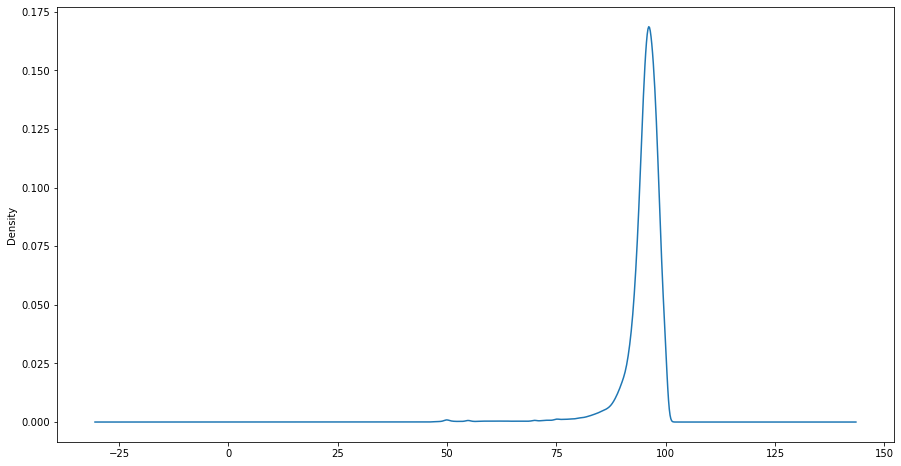

In [31]:
df['d1_spo2_avg'].plot(kind = 'kde')

In [32]:
df['d1_spo2_avg'].describe()

count    91707.000000
mean        94.858719
std          5.112105
min         13.000000
25%         94.000000
50%         96.000000
75%         97.500000
max        100.000000
Name: d1_spo2_avg, dtype: float64

In [33]:
k,m = yeojohnson(df['d1_spo2_avg'])
pd.Series(k).skew()

-0.22859279633273283

In [34]:
df['d1_spo2_avg'] = k

In [35]:
si = list(si)
si.remove('d1_spo2_max')
si.remove('d1_spo2_min')
si.append('d1_spo2_avg')

In [36]:
pd.DataFrame({'Skewness': df[si].skew()}) # final skewness

,Skewness
age,-0.165724
bmi,-0.011860
apache_3j_diagnosis,-0.017941
map_apache,0.116654
temp_apache,0.285232
d1_diasbp_max,-0.001554
d1_diasbp_noninvasive_max,-0.001638
d1_heartrate_max,0.000132
d1_resprate_max,-0.016022
d1_sysbp_max,0.000120


# Feature engineering

In [37]:
df.drop('map_apache', axis = 1, inplace = True)

In [38]:
df['d1_heartrate_avg'] = (df['d1_heartrate_min'] + df['d1_heartrate_min']) / 2

In [39]:
df.drop(['d1_heartrate_min','d1_heartrate_max'], axis = 1, inplace = True)

In [40]:
df['d1_potassium_avg'] = (df['d1_potassium_min'] + df['d1_potassium_min']) / 2

In [41]:
df.drop(['d1_potassium_min','d1_potassium_max'], axis = 1, inplace = True)

In [42]:
df['d1_resprate_avg'] = (df['d1_resprate_min'] + df['d1_resprate_max']) / 2

In [43]:
df.drop(['d1_resprate_min','d1_resprate_max'], axis = 1, inplace = True)

In [44]:
df.drop('apache_4a_icu_death_prob', axis =1, inplace = True)

In [45]:
df_num = ['age', 'bmi', 'apache_3j_diagnosis', 'heart_rate_apache',
       'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_avg', 'd1_resprate_avg','d1_spo2_avg', 'd1_sysbp_max',
       'd1_sysbp_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_avg', 'apache_4a_hospital_death_prob'
       ]

# Statistical test for selecting significant features

In [46]:
from scipy import stats

In [47]:
# Null : Attribute is independent of target
# Alternate : Attribute is dependent of target
pvc = []
for i in df_cat:
    stat,pval,dof,bk = stats.chi2_contingency(pd.crosstab(df[i],df['hospital_death']), correction= False)
    pvc.append(pval)
pvc = pd.DataFrame(pvc, index = df_cat, columns = ['Chi2 Contingency P-Values'])
pvc
# Thus for p-values less than 0.05, rejecting the null hypothesis by saying, attributes are dependent on target variable
# which implies that they are significant features

,Chi2 Contingency P-Values
elective_surgery,1.167753e-176
gender,3.911108e-02
apache_post_operative,1.146684e-141
arf_apache,2.880603e-16
intubated_apache,0.000000e+00
ventilated_apache,0.000000e+00
aids,1.874203e-01
cirrhosis,2.185882e-32
diabetes_mellitus,9.885507e-07
hepatic_failure,1.718656e-31


In [48]:
pvc[pvc['Chi2 Contingency P-Values'] > 0.05] # statistically insignificant features

,Chi2 Contingency P-Values
aids,0.18742


In [49]:
# NULL : Means are same for all the groups
# Alternate : Means are different for atleast one group
pvn = []
for i in df_num:
    df_0 = df[df['hospital_death'] == 0]
    df_1 = df[df['hospital_death'] == 1]
    stat,pval = stats.f_oneway(df_0[i],df_1[i])
    pvn.append(pval)
pvn = pd.DataFrame(pvn, index = df_num, columns = ['ANOVA P-Values'])
pvn
# Thus for p-values less than 0.05, null hypothesis is rejected by saying,the attribute is significant in predicting the target variable.

,ANOVA P-Values
age,6.876947e-244
bmi,1.625528e-41
apache_3j_diagnosis,2.444070e-129
heart_rate_apache,8.992587e-233
resprate_apache,2.236594e-150
temp_apache,0.000000e+00
d1_diasbp_max,4.876760e-03
d1_diasbp_min,0.000000e+00
d1_heartrate_avg,2.695245e-01
d1_resprate_avg,3.643018e-15


In [50]:
pvn[pvn['ANOVA P-Values'] > 0.05] # statistically insignificant features

,ANOVA P-Values
d1_heartrate_avg,0.269525
d1_glucose_min,0.974502


In [51]:
df.drop(['d1_heartrate_avg','d1_glucose_min','aids'], axis = 1, inplace = True)

In [52]:
df_num.remove('d1_heartrate_avg')
df_num.remove('d1_glucose_min')

In [53]:
df_cat.remove('aids')

In [54]:
df.columns

Index(['age', 'bmi', 'elective_surgery', 'gender', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'heart_rate_apache',
       'intubated_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max',
       'd1_sysbp_noninvasive_min', 'd1_glucose_max',
       'apache_4a_hospital_death_prob', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_death', 'Gastrointestinal',
       'Genitourinary', 'Gynecological', 'Hematological', 'Metabolic',
       'Musculoskeletal/Skin', 'Neurological', 'Respiratory', 'Sepsis',
       'Trauma', 'd1_spo2_avg', 'd1_potassium_avg', 'd1_resprate_avg'],
      dtype='object')

# Scaling and Train-test split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
df[df_num]

,age,bmi,apache_3j_diagnosis,heart_rate_apache,resprate_apache,temp_apache,d1_diasbp_max,d1_diasbp_min,d1_resprate_avg,d1_spo2_avg,d1_sysbp_max,d1_sysbp_min,d1_glucose_max,d1_potassium_avg,apache_4a_hospital_death_prob
0,1171.934239,1.488204,14.489643,118.0,36.0,9.115401e+06,3.532215,37.0,5.555119,4.584356e+26,4.588091,73.0,1.387514,3.4,0.064506
1,1463.077748,1.517642,10.835796,120.0,33.0,5.399831e+06,3.756098,31.0,6.553691,3.299508e+26,4.757298,67.0,1.383286,3.8,0.109768
2,200.032306,1.539672,16.068353,102.0,37.0,6.637165e+06,3.705346,48.0,4.541623,1.477132e+27,4.694746,105.0,1.384298,3.9,-0.000000
3,1601.668567,1.487552,18.883826,114.0,4.0,5.189653e+06,3.293167,42.0,4.044578,2.299234e+27,4.751797,84.0,1.390057,3.5,0.033166
4,124.234474,1.518915,15.317276,60.0,16.0,6.637165e+06,3.783321,57.0,8.536117,2.471954e+27,4.688826,120.0,1.384298,3.9,0.039664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,1395.891551,1.490566,14.481124,115.0,9.0,6.553825e+06,3.815731,44.0,5.049300,1.091256e+27,4.567814,67.0,1.405298,4.2,0.071706
91709,829.305806,1.588611,14.481034,100.0,33.0,7.244259e+06,3.580189,40.0,6.554425,3.488636e+25,4.560947,65.0,1.388912,3.8,0.026026
91710,630.678292,1.516638,16.061266,158.0,4.0,5.916436e+06,3.616095,49.0,0.555119,7.405391e+26,4.434965,75.0,1.409298,3.2,0.039664
91711,1081.339917,1.492232,10.835796,60.0,14.0,6.308755e+06,3.783321,32.0,7.544578,8.658608e+26,4.723746,111.0,1.384298,3.9,0.050978


In [57]:
cat = df[df_cat]
cat

,elective_surgery,gender,apache_post_operative,arf_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
cat.reset_index(inplace= True)

In [59]:
df_nu_sc = pd.DataFrame(StandardScaler().fit_transform(df[df_num]), columns= df_num)

In [60]:
df_nu_sc.reset_index(inplace= True)

In [61]:
y = df['hospital_death']

In [62]:
#len(y),len(x),len(df_nu_sc),len(cat)

In [63]:
df_nu_sc.drop('index',axis = 1, inplace = True)

In [64]:
cat.drop('index',axis = 1, inplace = True)

In [65]:
for i in cat.columns:
    print(cat[i].value_counts() * 100 / sum(cat[i].value_counts()))
    print('')

0    81.626266
1    18.373734
Name: elective_surgery, dtype: float64

0.0    53.966437
1.0    46.033563
Name: gender, dtype: float64

0    79.889212
1    20.110788
Name: apache_post_operative, dtype: float64

0.0    97.223767
1.0     2.776233
Name: arf_apache, dtype: float64

0.0    84.994602
1.0    15.005398
Name: intubated_apache, dtype: float64

0.0    67.679675
1.0    32.320325
Name: ventilated_apache, dtype: float64

0.0    98.442867
1.0     1.557133
Name: cirrhosis, dtype: float64

0.0    77.658194
1.0    22.341806
Name: diabetes_mellitus, dtype: float64

0.0    98.711113
1.0     1.288887
Name: hepatic_failure, dtype: float64

0.0    97.403688
1.0     2.596312
Name: immunosuppression, dtype: float64

0.0    99.298854
1.0     0.701146
Name: leukemia, dtype: float64

0.0    99.589999
1.0     0.410001
Name: lymphoma, dtype: float64

0.0    97.952174
1.0     2.047826
Name: solid_tumor_with_metastasis, dtype: float64



In [66]:
cat.drop(['lymphoma', 'leukemia', 'arf_apache', 'solid_tumor_with_metastasis','hepatic_failure', 'cirrhosis', 'immunosuppression'], axis = 1, inplace = True)

In [67]:
x = pd.merge(df_nu_sc,cat, left_index= True, right_index= True)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state= 45, stratify= y)

# SMOTE Sampling

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE(k_neighbors= 9) # smote only for train data
x_smote,y_smote = smote.fit_resample(x_train,y_train)

# Sequential Feature Selection (backward)

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

SequentialFeatureSelector(cv=ShuffleSplit(n_splits=1, random_state=45, test_size=0.3, train_size=None),
                          estimator=LogisticRegression(), forward=False,
                          k_features='best', scoring='roc_auc')

In [116]:
dt = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=1, test_size= 0.3, random_state= 45)
sfs_dt = sfs(dt,k_features='best',forward= False,cv = cv,scoring='roc_auc')
sfs_dt.fit(x_smote,y_smote)

SequentialFeatureSelector(cv=ShuffleSplit(n_splits=1, random_state=45, test_size=0.3, train_size=None),
                          estimator=DecisionTreeClassifier(), forward=False,
                          k_features='best', scoring='roc_auc')

In [72]:
nb = GaussianNB()
cv = ShuffleSplit(n_splits=1, test_size= 0.3, random_state= 45)
sfs_nb = sfs(nb,k_features='best',forward= False,cv = cv,scoring='roc_auc')
sfs_nb.fit(x_smote,y_smote)

SequentialFeatureSelector(cv=ShuffleSplit(n_splits=1, random_state=45, test_size=0.3, train_size=None),
                          estimator=GaussianNB(), forward=False,
                          k_features='best', scoring='roc_auc')

In [120]:
len(x_smote.columns),len(sfs_lr.k_feature_names_),len(sfs_dt.k_feature_names_),len(sfs_nb.k_feature_names_)

(21, 21, 3, 13)

In [121]:
sfs_dt.k_feature_names_

('apache_4a_hospital_death_prob', 'gender', 'intubated_apache')

In [73]:
sfs_nb.k_feature_names_

('age',
 'bmi',
 'resprate_apache',
 'd1_resprate_avg',
 'd1_spo2_avg',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_glucose_max',
 'apache_4a_hospital_death_prob',
 'gender',
 'ventilated_apache',
 'diabetes_mellitus')

# Recrusive Feature Elimination

In [134]:
dt = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=1, test_size= 0.3, random_state= 45)
rfe = RFE(dt,n_features_to_select=3)
rfe.fit(x_smote,y_smote)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [137]:
x_smote.columns[rfe.support_]

Index(['apache_3j_diagnosis', 'd1_resprate_avg',
       'apache_4a_hospital_death_prob'],
      dtype='object')

In [74]:
x_smote = x_smote[list(sfs_nb.k_feature_names_)]

In [75]:
x_test = x_test[list(sfs_nb.k_feature_names_)]

In [76]:
x_train = x_train[list(sfs_nb.k_feature_names_)]

In [77]:
x_smote.shape,x_train.shape,x_test.shape

((117308, 12), (64194, 12), (27513, 12))

# Random Forest

In [78]:
from sklearn import metrics

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [82]:
rf = RandomForestClassifier() # test
mrf = rf.fit(x_train,y_train)
y_pred_rf = mrf.predict(x_test)
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25138
           1       0.68      0.27      0.38      2375

    accuracy                           0.93     27513
   macro avg       0.81      0.63      0.67     27513
weighted avg       0.91      0.93      0.91     27513



In [112]:
y_pred_prob_rf = mrf.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4))

roc_auc score 0.8622


In [85]:
y_pred_prob_rf = mrf.predict_proba(x_test)[:,1]
rf_base = round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4)

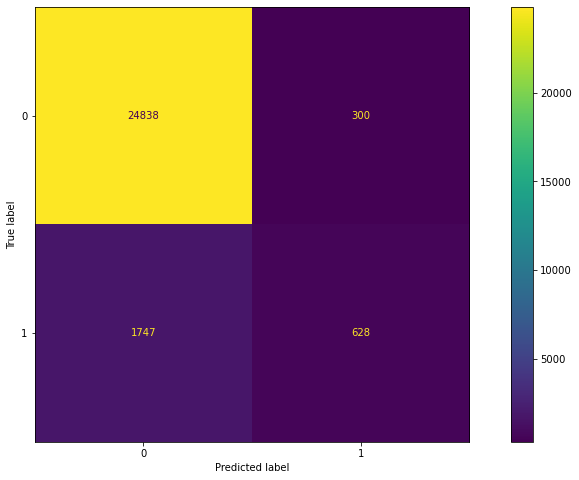

In [156]:
print(metrics.plot_confusion_matrix(rf,x_test,y_test))

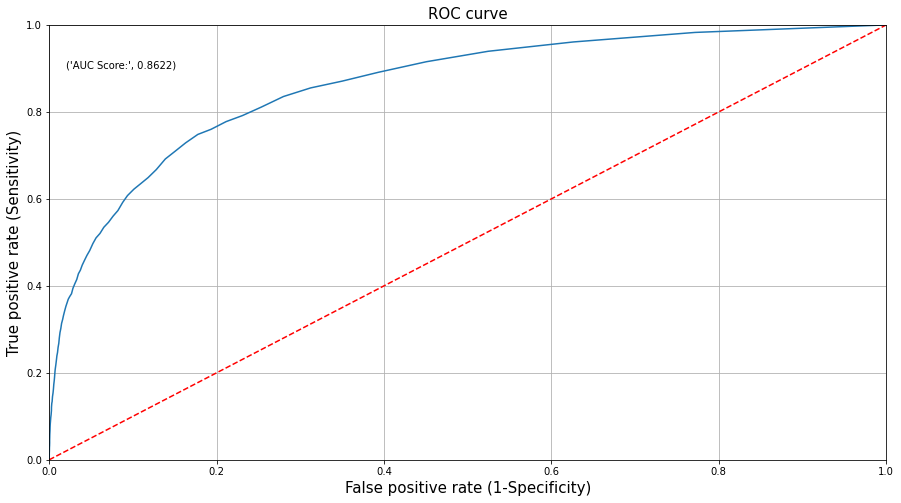

In [107]:
plot_roc(mrf,x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58654
           1       1.00      1.00      1.00      5540

    accuracy                           1.00     64194
   macro avg       1.00      1.00      1.00     64194
weighted avg       1.00      1.00      1.00     64194

1.0


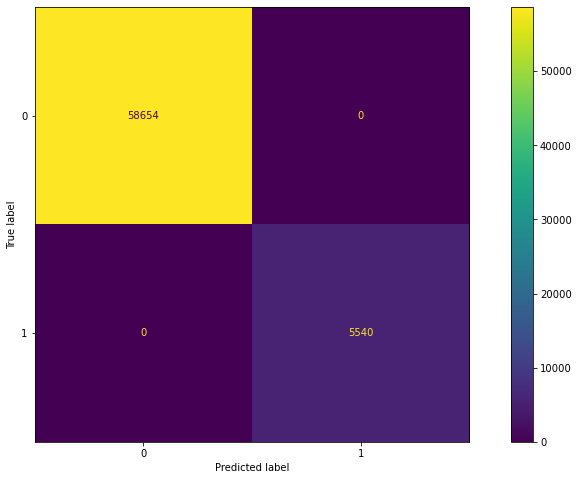

In [157]:
rf = RandomForestClassifier() # train
mrf = rf.fit(x_train,y_train)
y_pred_rf = mrf.predict(x_train)
print(metrics.classification_report(y_train,y_pred_rf))
print(metrics.roc_auc_score(y_train,y_pred_rf))
print(metrics.plot_confusion_matrix(rf,x_train,y_train))

In [ ]:
# hyper-parameter tuning for random forest classifier

In [4]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [563]:
par = [{'n_estimators':np.arange(1,101,2),'criterion':['entropy','gini'],'max_depth':[1,2,3,4]}]
kf = KFold(n_splits= 15, shuffle=True, random_state= 53)
sea = GridSearchCV(rf,param_grid= par,cv = kf, scoring='roc_auc')
sea.fit(x_train,y_train)
print('Best Parameters are',sea.best_params_)

Best Parameters are {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 93}


In [158]:
rf = RandomForestClassifier(n_estimators= 93,criterion= 'entropy', max_depth=4) # test
mrf = rf.fit(x_train,y_train)
y_pred_rf = mrf.predict(x_test)
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25138
           1       0.84      0.06      0.12      2375

    accuracy                           0.92     27513
   macro avg       0.88      0.53      0.54     27513
weighted avg       0.91      0.92      0.88     27513



In [159]:
print(metrics.roc_auc_score(y_test,y_pred_rf))

0.5318243464497029


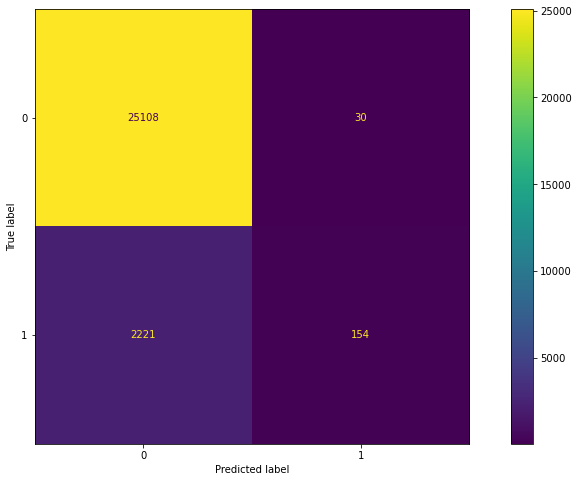

In [160]:
print(metrics.plot_confusion_matrix(rf,x_test,y_test))

# Random Forest with smote sampling

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25138
           1       0.46      0.47      0.46      2375

    accuracy                           0.91     27513
   macro avg       0.70      0.71      0.71     27513
weighted avg       0.91      0.91      0.91     27513

roc_auc score 0.8618


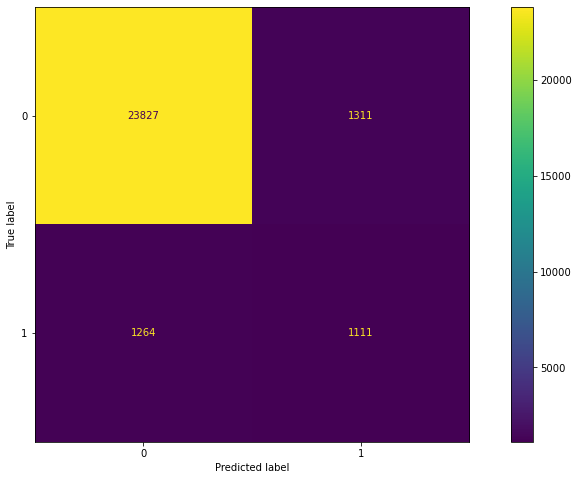

In [114]:
# test
rf = RandomForestClassifier()
mrf = rf.fit(x_smote,y_smote)
y_pred_rf = mrf.predict(x_test)
print(metrics.classification_report(y_test,y_pred_rf))
y_pred_prob_rf = mrf.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4))
print(metrics.plot_confusion_matrix(rf,x_test,y_test))

In [81]:
# test
rf = RandomForestClassifier()
mrf = rf.fit(x_smote,y_smote)
y_pred_rf = mrf.predict(x_test)
print(metrics.classification_report(y_test,y_pred_rf))
y_pred_prob_rf = mrf.predict_proba(x_test)[:,1]
rf_best = round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4)
rf_best

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25138
           1       0.45      0.45      0.45      2375

    accuracy                           0.90     27513
   macro avg       0.70      0.70      0.70     27513
weighted avg       0.91      0.90      0.90     27513



0.8614

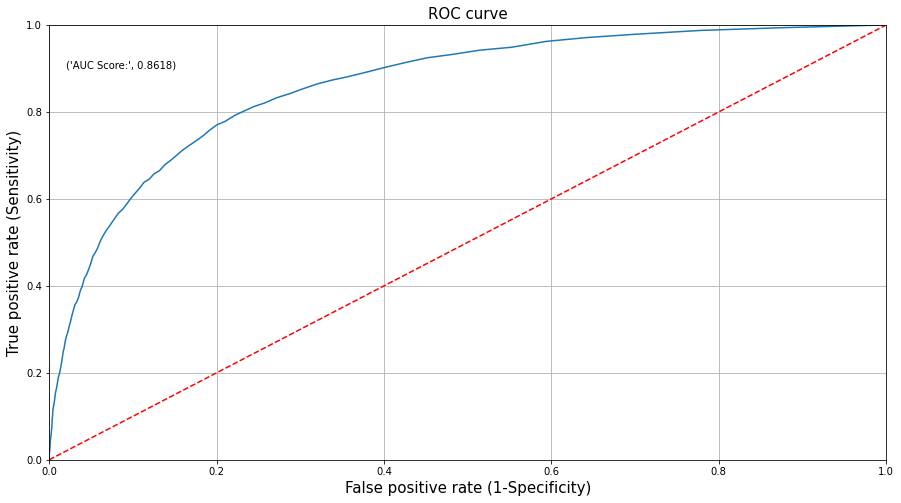

In [115]:
plot_roc(mrf,x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58654
           1       1.00      1.00      1.00     58654

    accuracy                           1.00    117308
   macro avg       1.00      1.00      1.00    117308
weighted avg       1.00      1.00      1.00    117308

1.0


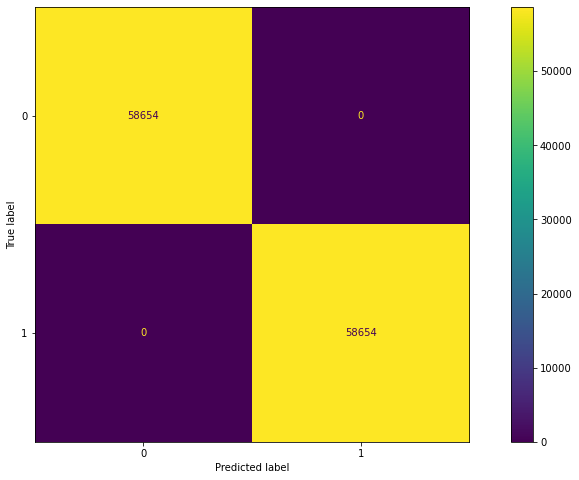

In [162]:
# train
rf = RandomForestClassifier()
mrf = rf.fit(x_smote,y_smote)
y_pred_rf = mrf.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_rf))
print(metrics.roc_auc_score(y_smote,y_pred_rf))
print(metrics.plot_confusion_matrix(rf,x_smote,y_smote))

# Tuned RF Model with SMOTE 

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     25138
           1       0.29      0.71      0.41      2375

    accuracy                           0.82     27513
   macro avg       0.63      0.77      0.65     27513
weighted avg       0.91      0.82      0.85     27513

roc_auc score 0.8545


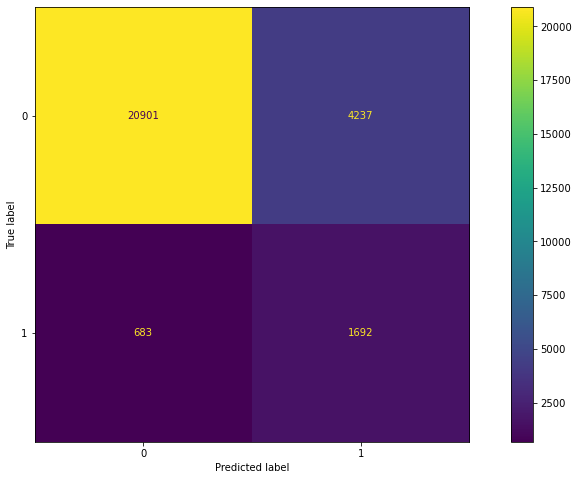

In [116]:
# test
rf = RandomForestClassifier(n_estimators= 93,criterion= 'entropy', max_depth=4)
mrf = rf.fit(x_smote,y_smote)
y_pred_rf = mrf.predict(x_test)
print(metrics.classification_report(y_test,y_pred_rf))
y_pred_prob_rf = mrf.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4))
#print(metrics.roc_auc_score(y_test,y_pred_rf))
print(metrics.plot_confusion_matrix(rf,x_test,y_test))

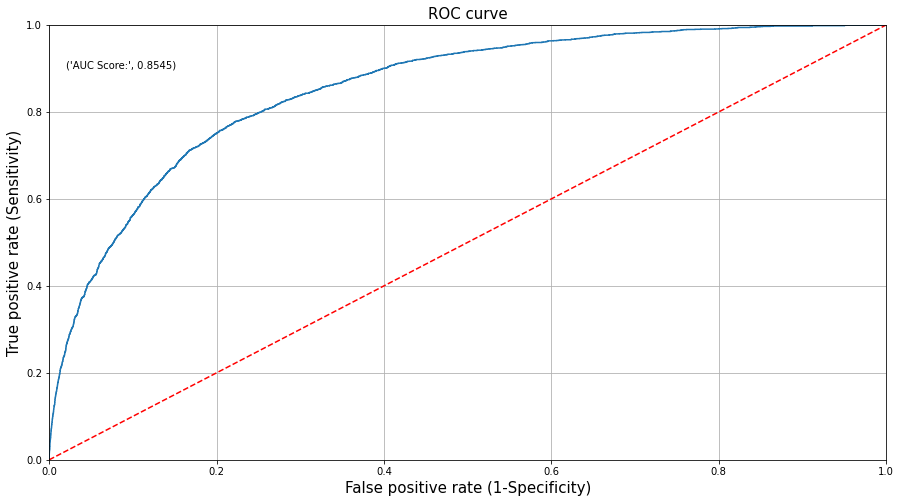

In [117]:
plot_roc(mrf,x_test)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     58654
           1       0.83      0.81      0.82     58654

    accuracy                           0.82    117308
   macro avg       0.82      0.82      0.82    117308
weighted avg       0.82      0.82      0.82    117308

roc_auc score 0.8954


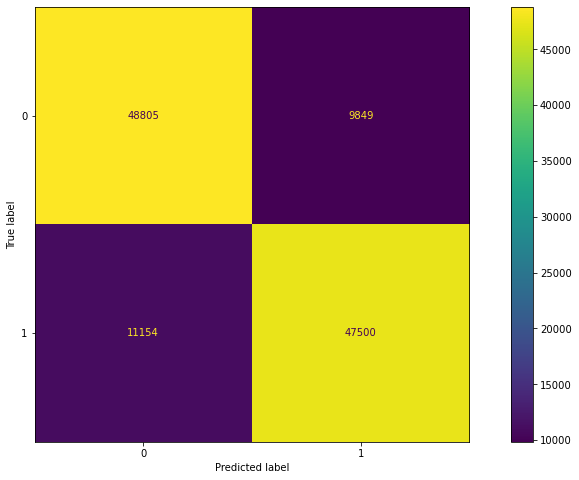

In [118]:
# train
rf = RandomForestClassifier(n_estimators= 93,criterion= 'entropy', max_depth=4)
mrf = rf.fit(x_smote,y_smote)
y_pred_rf = mrf.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_rf))
y_pred_prob_rf = mrf.predict_proba(x_smote)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_smote, y_pred_prob_rf),4))
#print(metrics.roc_auc_score(y_smote,y_pred_rf))
print(metrics.plot_confusion_matrix(rf,x_smote,y_smote))

# Naive-Bayes Boost

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     25138
           1       0.14      0.53      0.22      2375

    accuracy                           0.67     27513
   macro avg       0.54      0.61      0.51     27513
weighted avg       0.87      0.67      0.74     27513

roc_auc score 0.6292


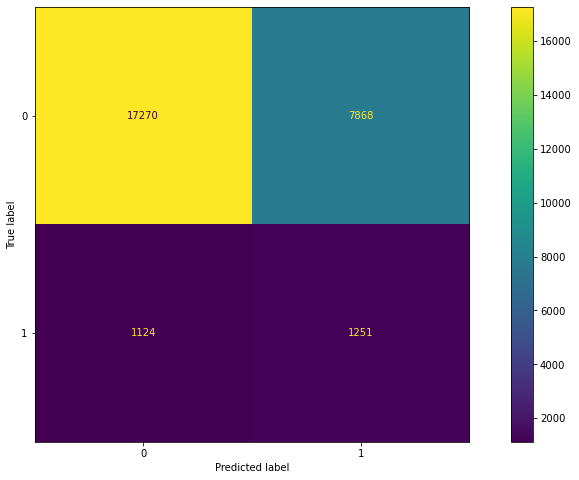

In [124]:
nb = GaussianNB() # test
a = AdaBoostClassifier(base_estimator= nb,n_estimators=100,random_state= 39)
mnba = a.fit(x_train,y_train)
y_pred_mnba = mnba.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mnba))
y_pred_prob_nb = mnba.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_nb),4))
#print(metrics.roc_auc_score(y_test,y_pred_mnba))
print(metrics.plot_confusion_matrix(a,x_test,y_test))

In [84]:
nb = GaussianNB() # test
a = AdaBoostClassifier(base_estimator= nb,n_estimators=100,random_state= 39)
mnba = a.fit(x_train,y_train)
y_pred_mnba = mnba.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mnba))
y_pred_prob_nb = mnba.predict_proba(x_test)[:,1]
nb_boost = round(metrics.roc_auc_score(y_test, y_pred_prob_nb),4)
nb_boost

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     25138
           1       0.07      0.19      0.11      2375

    accuracy                           0.73     27513
   macro avg       0.49      0.48      0.47     27513
weighted avg       0.84      0.73      0.78     27513



0.5821

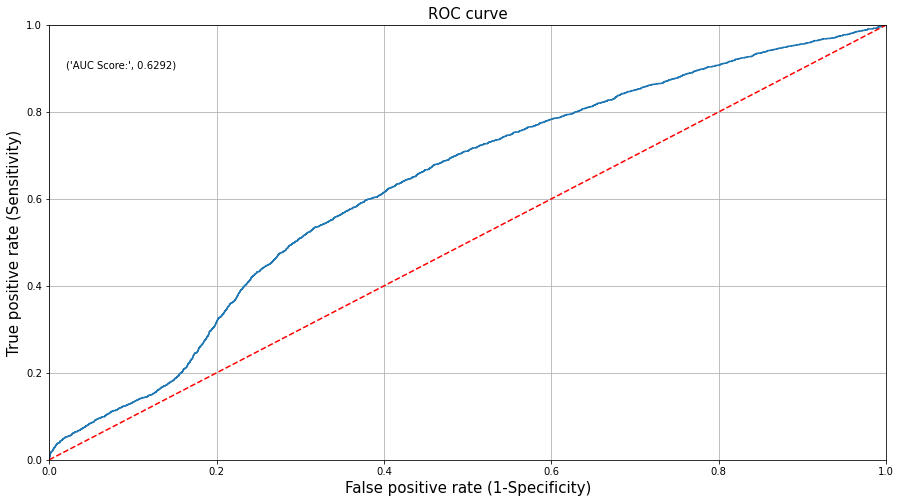

In [125]:
plot_roc(mnba,x_test)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     58654
           1       0.13      0.52      0.21      5540

    accuracy                           0.67     64194
   macro avg       0.54      0.60      0.50     64194
weighted avg       0.87      0.67      0.74     64194

0.6001966005377679


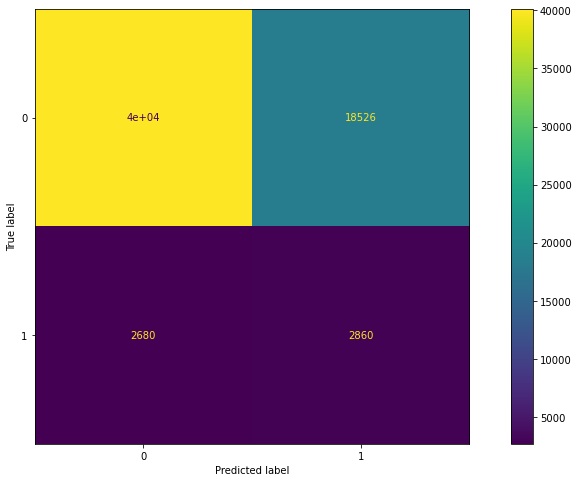

In [174]:
nb = GaussianNB() # train
a = AdaBoostClassifier(base_estimator= nb,n_estimators=100,random_state= 39)
mnba = a.fit(x_train,y_train)
y_pred_mnba = mnba.predict(x_train)
print(metrics.classification_report(y_train,y_pred_mnba))
print(metrics.roc_auc_score(y_train,y_pred_mnba))
print(metrics.plot_confusion_matrix(a,x_train,y_train))

# Naive-Bayes boost with smote sampling

              precision    recall  f1-score   support

           0       0.93      0.21      0.34     25138
           1       0.09      0.82      0.16      2375

    accuracy                           0.26     27513
   macro avg       0.51      0.52      0.25     27513
weighted avg       0.85      0.26      0.33     27513

roc_auc score 0.6983


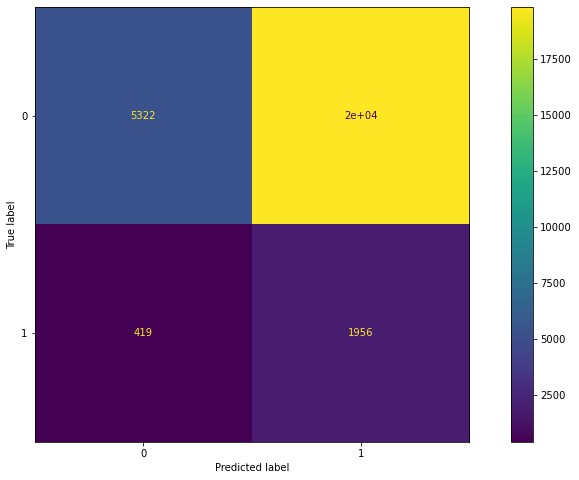

In [126]:
nb = GaussianNB() # test
a = AdaBoostClassifier(base_estimator= nb, n_estimators= 100,random_state= 39)
mnba = a.fit(x_smote,y_smote)
y_pred_mnba = mnba.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mnba))
y_pred_prob_nb = mnba.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_nb),4))
#print(metrics.roc_auc_score(y_test,y_pred_mnba))
print(metrics.plot_confusion_matrix(a,x_test,y_test))

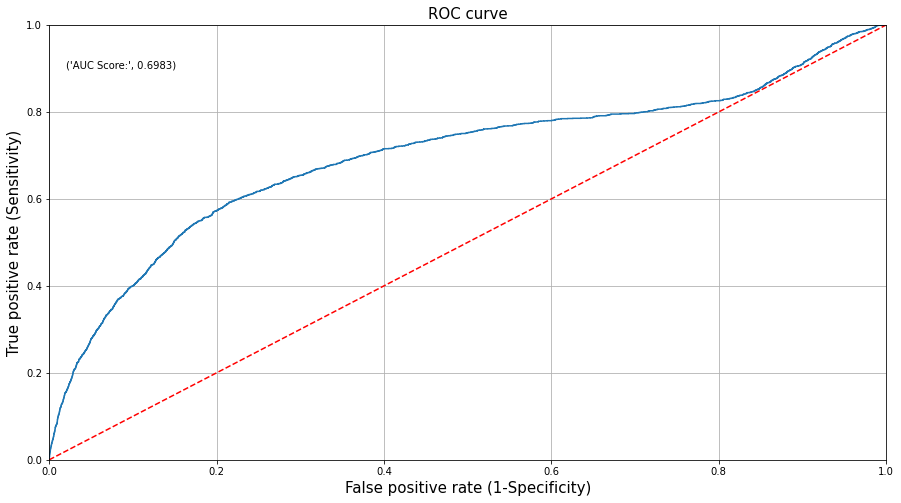

In [127]:
plot_roc(mnba,x_test)

              precision    recall  f1-score   support

           0       0.65      0.23      0.34     58654
           1       0.53      0.87      0.66     58654

    accuracy                           0.55    117308
   macro avg       0.59      0.55      0.50    117308
weighted avg       0.59      0.55      0.50    117308

0.5525624850820063


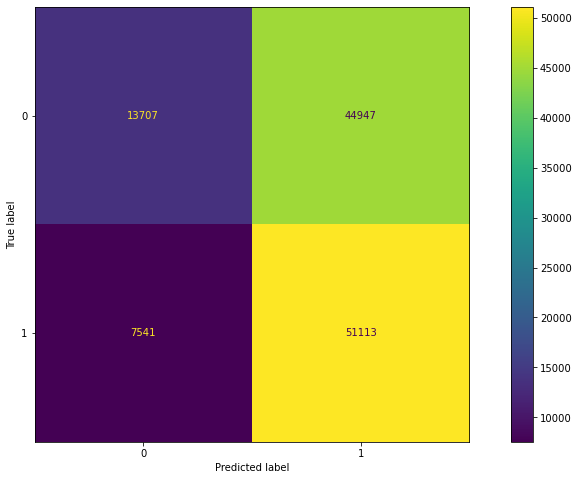

In [172]:
nb = GaussianNB() # train
a = AdaBoostClassifier(base_estimator= nb,n_estimators=100,random_state= 39)
mnba = a.fit(x_smote,y_smote)
y_pred_mnba = mnba.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_mnba))
print(metrics.roc_auc_score(y_smote,y_pred_mnba))
print(metrics.plot_confusion_matrix(a,x_smote,y_smote))

# Naive-Bayes Bag

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     25138
           1       0.41      0.50      0.45      2375

    accuracy                           0.89     27513
   macro avg       0.68      0.72      0.70     27513
weighted avg       0.91      0.89      0.90     27513

roc_auc score 0.8606


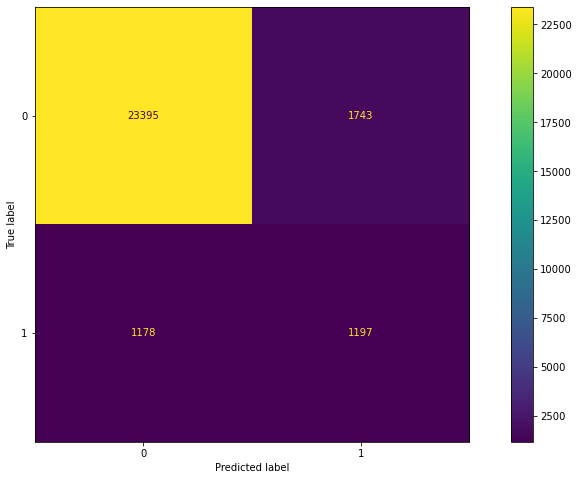

In [128]:
nb = GaussianNB()#test
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 50)
mbnb = bnb.fit(x_train,y_train)
y_pred_mbnb = mbnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mbnb))
y_pred_prob_bnb = mbnb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_bnb),4))
#print(metrics.roc_auc_score(y_test,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_test,y_test))

In [85]:
nb = GaussianNB()#test
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 50)
mbnb = bnb.fit(x_train,y_train)
y_pred_mbnb = mbnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mbnb))
y_pred_prob_bnb = mbnb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_bnb),4))
nb_bag_best = round(metrics.roc_auc_score(y_test, y_pred_prob_bnb),4)
nb_bag_best

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     25138
           1       0.41      0.50      0.45      2375

    accuracy                           0.89     27513
   macro avg       0.68      0.72      0.70     27513
weighted avg       0.91      0.89      0.90     27513

roc_auc score 0.8598


0.8598

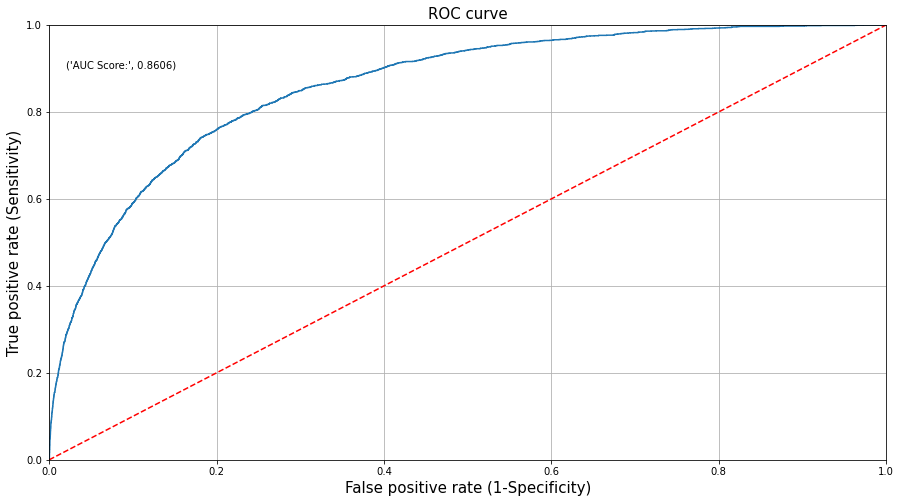

In [129]:
plot_roc(mbnb,x_test)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     58654
           1       0.41      0.50      0.45      5540

    accuracy                           0.89     64194
   macro avg       0.68      0.72      0.70     64194
weighted avg       0.91      0.89      0.90     64194

0.7173878563869448


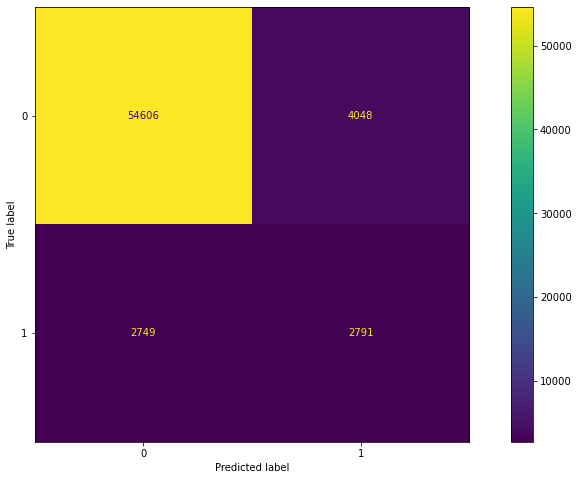

In [176]:
nb = GaussianNB() #train
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 50)
mbnb = bnb.fit(x_train,y_train)
y_pred_mbnb = mbnb.predict(x_train)
print(metrics.classification_report(y_train,y_pred_mbnb))
print(metrics.roc_auc_score(y_train,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_train,y_train))

# Naive-Bayes bag with smote sampling

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     25138
           1       0.26      0.77      0.39      2375

    accuracy                           0.79     27513
   macro avg       0.62      0.78      0.63     27513
weighted avg       0.91      0.79      0.83     27513

roc_auc score 0.8593


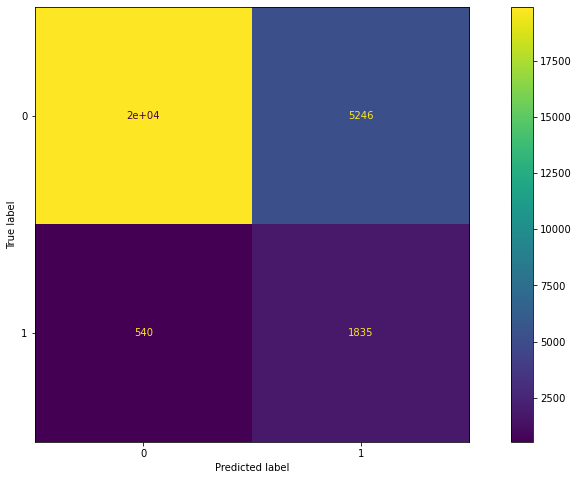

In [130]:
nb = GaussianNB() # test
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 50)
mbnb = bnb.fit(x_smote,y_smote)
y_pred_mbnb = mbnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mbnb))
y_pred_prob_bnb = mbnb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_bnb),4))
#print(metrics.roc_auc_score(y_test,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_test,y_test))

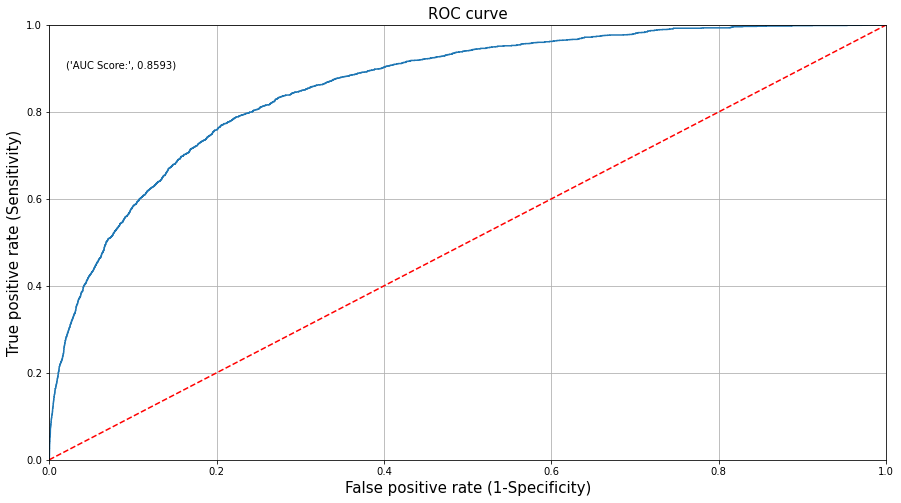

In [131]:
plot_roc(mbnb,x_test)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     58654
           1       0.79      0.78      0.78     58654

    accuracy                           0.79    117308
   macro avg       0.79      0.79      0.79    117308
weighted avg       0.79      0.79      0.79    117308

0.7853428581170936


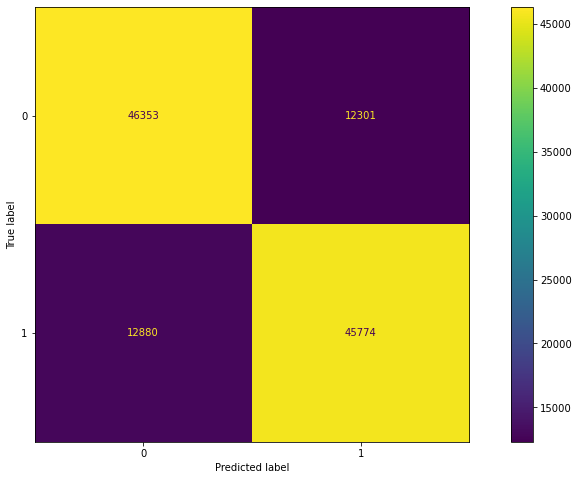

In [180]:
nb = GaussianNB() #train
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 50)
mbnb = bnb.fit(x_smote,y_smote)
y_pred_mbnb = mbnb.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_mbnb))
print(metrics.roc_auc_score(y_smote,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_smote,y_smote))

In [ ]:
# Hyper-parameter tuning for NB Bag

In [647]:
par = [{'n_estimators':np.arange(1,101,2)}]
kf = KFold(n_splits= 15, shuffle=True, random_state= 53)
sea = GridSearchCV(bnb,param_grid= par,cv = kf, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best Parameters are',sea.best_params_)

Best Parameters are {'n_estimators': 9}


              precision    recall  f1-score   support

           0       0.97      0.79      0.87     25138
           1       0.26      0.77      0.39      2375

    accuracy                           0.79     27513
   macro avg       0.62      0.78      0.63     27513
weighted avg       0.91      0.79      0.83     27513

roc_auc score 0.8594


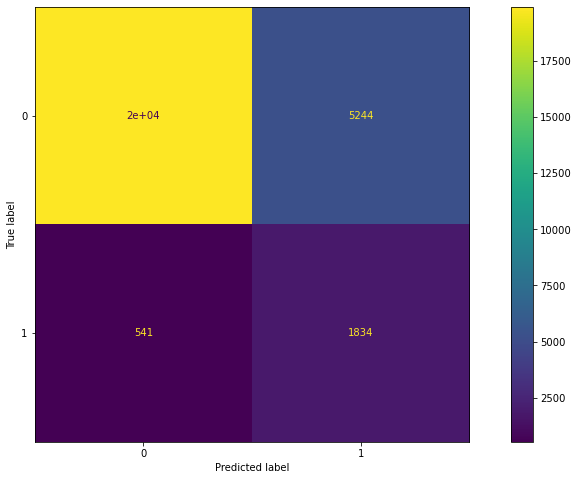

In [132]:
nb = GaussianNB() # test after hyper parameter tuning
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 9)
mbnb = bnb.fit(x_smote,y_smote)
y_pred_mbnb = mbnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mbnb))
y_pred_prob_bnb = mbnb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_bnb),4))
#print(metrics.roc_auc_score(y_test,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_test,y_test))

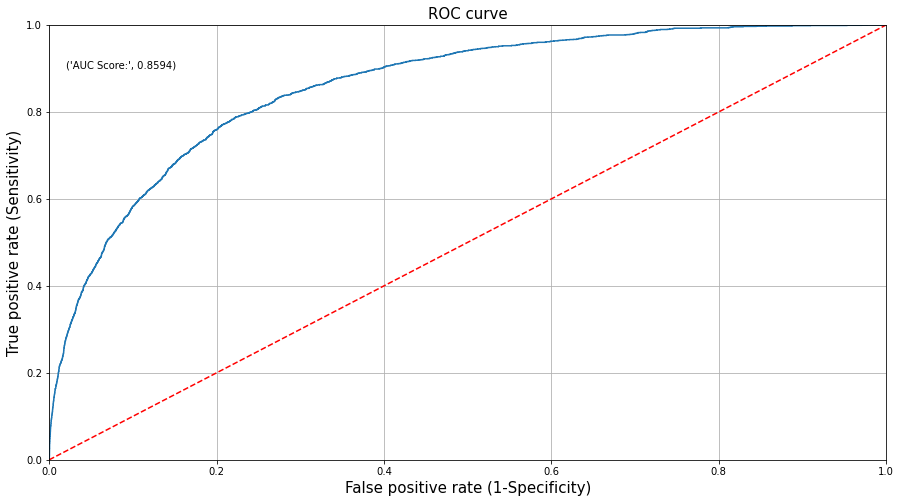

In [133]:
plot_roc(mbnb,x_test)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     58654
           1       0.79      0.78      0.78     58654

    accuracy                           0.79    117308
   macro avg       0.79      0.79      0.79    117308
weighted avg       0.79      0.79      0.79    117308

0.7853428581170934


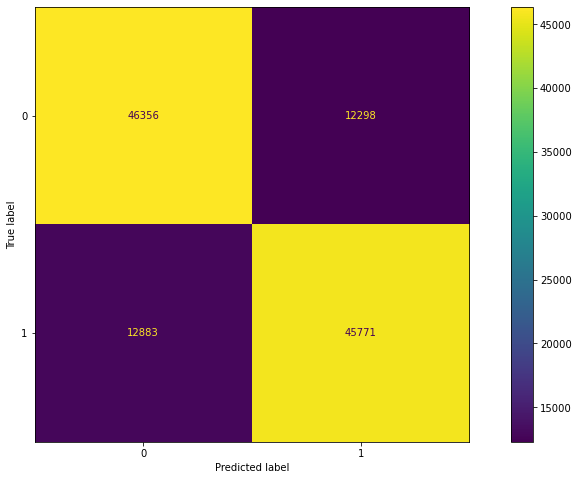

In [182]:
nb = GaussianNB() #train
bnb = BaggingClassifier(base_estimator= nb, n_estimators= 9)
mbnb = bnb.fit(x_smote,y_smote)
y_pred_mbnb = mbnb.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_mbnb))
print(metrics.roc_auc_score(y_smote,y_pred_mbnb))
print(metrics.plot_confusion_matrix(bnb,x_smote,y_smote))

# Neural Network 

In [86]:
from sklearn.neural_network import MLPClassifier

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25138
           1       0.68      0.21      0.32      2375

    accuracy                           0.92     27513
   macro avg       0.80      0.60      0.64     27513
weighted avg       0.91      0.92      0.90     27513

roc_auc score 0.8615


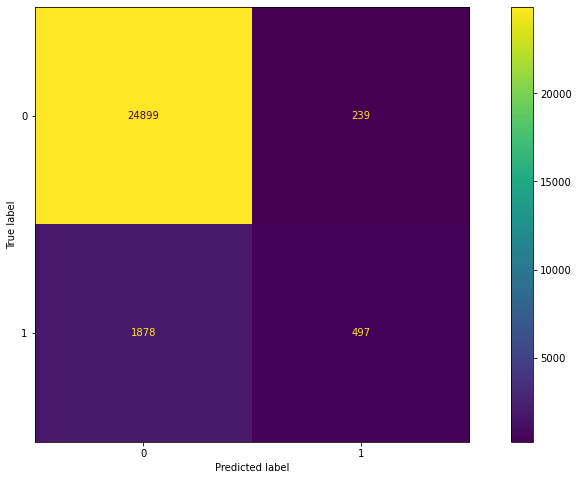

In [135]:
ann = MLPClassifier() # test
mann = ann.fit(x_train,y_train)
y_pred_mann = mann.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mann))
y_pred_prob_ann = mann.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ann),4))
#print('roc_auc-score:',metrics.roc_auc_score(y_test,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_test,y_test))

In [87]:
ann = MLPClassifier() # test
mann = ann.fit(x_train,y_train)
y_pred_mann = mann.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mann))
y_pred_prob_ann = mann.predict_proba(x_test)[:,1]
mlp_best = round(metrics.roc_auc_score(y_test, y_pred_prob_ann),4)
mlp_best

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25138
           1       0.63      0.25      0.36      2375

    accuracy                           0.92     27513
   macro avg       0.78      0.62      0.66     27513
weighted avg       0.91      0.92      0.91     27513



0.867

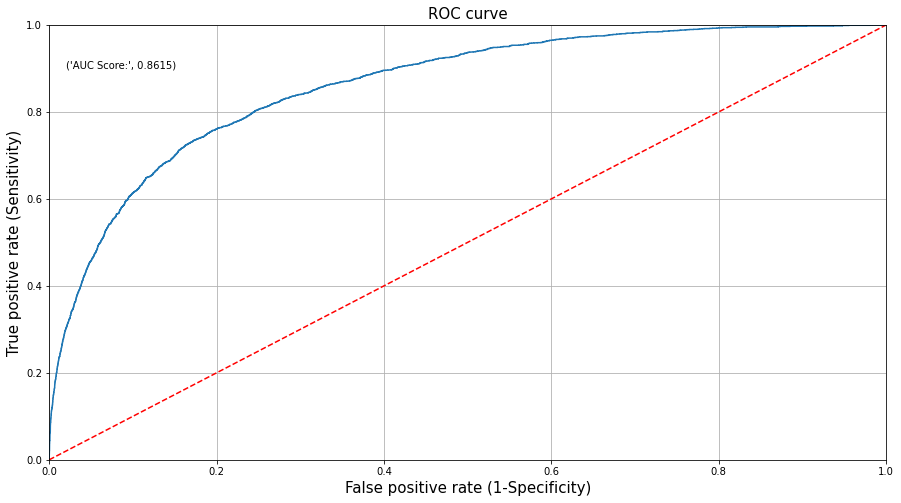

In [136]:
plot_roc(mann,x_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     58654
           1       0.72      0.42      0.53      5540

    accuracy                           0.94     64194
   macro avg       0.84      0.70      0.75     64194
weighted avg       0.93      0.94      0.93     64194

roc_auc-score: 0.7038837530846934


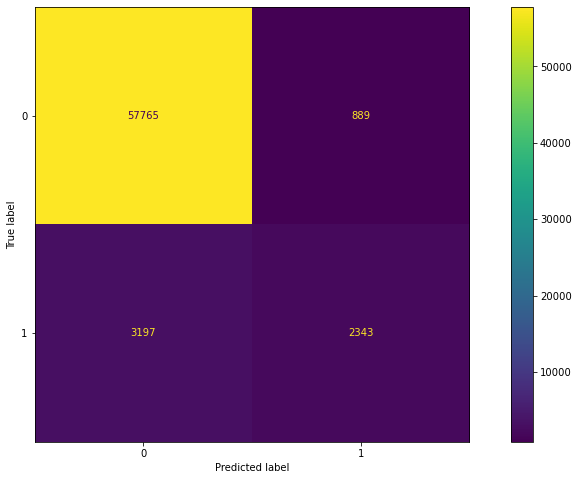

In [80]:
ann = MLPClassifier() # train
mann = ann.fit(x_train,y_train)
y_pred_mann = mann.predict(x_train)
print(metrics.classification_report(y_train,y_pred_mann))
print('roc_auc-score:',metrics.roc_auc_score(y_train,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_train,y_train))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     25138
           1       0.33      0.55      0.42      2375

    accuracy                           0.87     27513
   macro avg       0.64      0.72      0.67     27513
weighted avg       0.90      0.87      0.88     27513

roc_auc score 0.8315


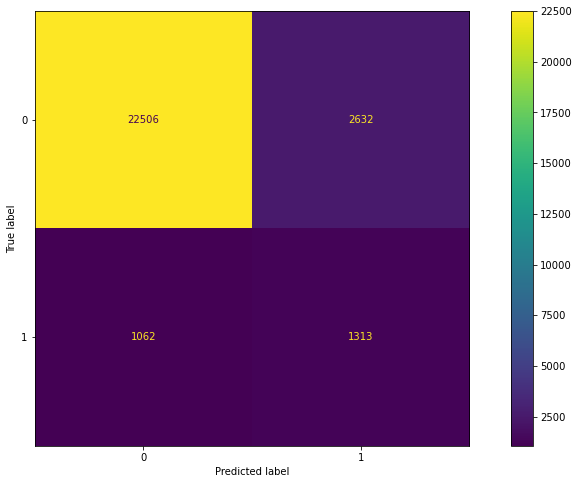

In [137]:
ann = MLPClassifier(learning_rate='invscaling') # after smote test
mann = ann.fit(x_smote,y_smote)
y_pred_mann = mann.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mann))
y_pred_prob_ann = mann.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ann),4))
#print('roc_auc-score:',metrics.roc_auc_score(y_test,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_test,y_test))

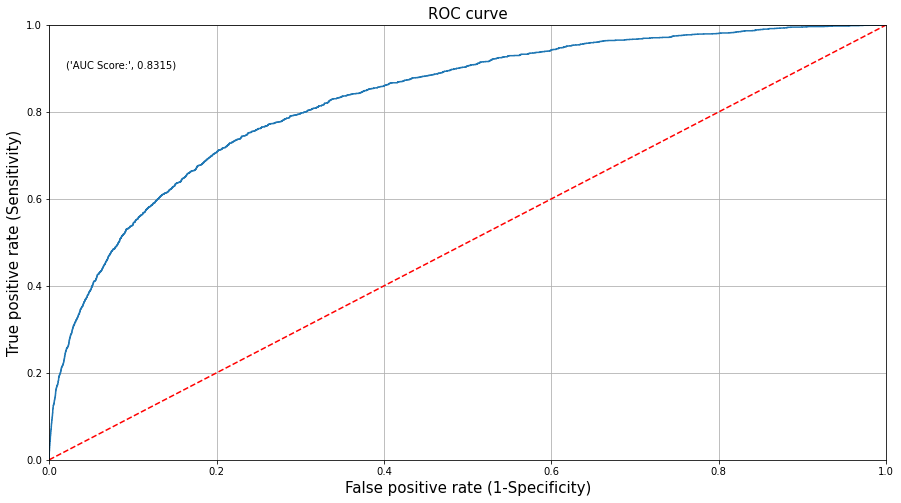

In [138]:
plot_roc(mann,x_test)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     58654
           1       0.91      0.86      0.88     58654

    accuracy                           0.88    117308
   macro avg       0.89      0.88      0.88    117308
weighted avg       0.89      0.88      0.88    117308

roc_auc-score: 0.8844494834111911


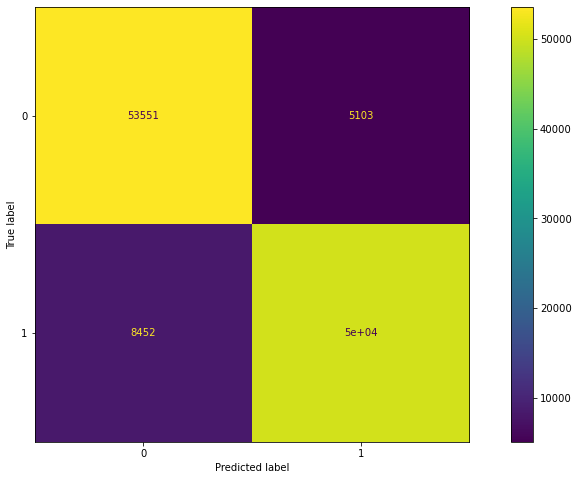

In [185]:
ann = MLPClassifier(learning_rate='invscaling') # after smote train
mann = ann.fit(x_smote,y_smote)
y_pred_mann = mann.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_mann))
print('roc_auc-score:',metrics.roc_auc_score(y_smote,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_smote,y_smote))

In [ ]:
# Hyper-parameter tuning for Neural network

In [84]:
tnn = [{'hidden_layer_sizes':[5],'activation':['identity','logistic','tanh','relu'],'solver':['lbfgs','sgd','adam'],
       'learning_rate':['constant','invscaling','adaptive']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'tanh', 'hidden_layer_sizes': 5, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [88]:
tnn = [{'hidden_layer_sizes':[10,15,20],'activation':['relu','tanh'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 20, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [89]:
tnn = [{'hidden_layer_sizes':[25,30,35],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 35, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [90]:
tnn = [{'hidden_layer_sizes':[40,45,50],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [91]:
tnn = [{'hidden_layer_sizes':[55,100],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [92]:
tnn = [{'hidden_layer_sizes':[100,150],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [93]:
tnn = [{'hidden_layer_sizes':[200,300],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 300, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [94]:
tnn = [{'hidden_layer_sizes':[400,500],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 500, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [95]:
tnn = [{'hidden_layer_sizes':[600,700],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 700, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [96]:
tnn = [{'hidden_layer_sizes':[800,1000],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 1000, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [97]:
tnn = [{'hidden_layer_sizes':[1200,1500],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 1500, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [98]:
tnn = [{'hidden_layer_sizes':[1600,2000],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 1600, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [99]:
tnn = [{'hidden_layer_sizes':[1500,1550,1600],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 1500, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [100]:
tnn = [{'hidden_layer_sizes':[1450,1500],'activation':['relu'],'solver':['adam'],
       'learning_rate':['invscaling']}]
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
ann = MLPClassifier()
sea = GridSearchCV(ann, param_grid= tnn, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best parameters are',sea.best_params_)

Best parameters are {'activation': 'relu', 'hidden_layer_sizes': 1500, 'learning_rate': 'invscaling', 'solver': 'adam'}


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     25138
           1       0.34      0.37      0.35      2375

    accuracy                           0.88     27513
   macro avg       0.64      0.65      0.64     27513
weighted avg       0.89      0.88      0.89     27513

roc_auc-score: 0.6494241052547831


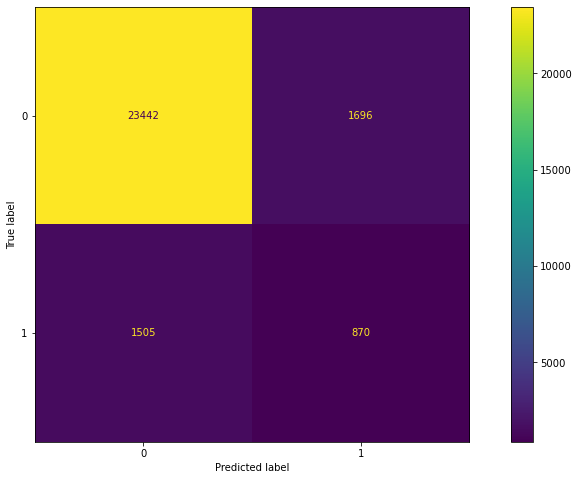

In [186]:
ann = MLPClassifier(hidden_layer_sizes= 1500,learning_rate='invscaling') # after smote and tuning test, results are worse than base model
mann = ann.fit(x_smote,y_smote)
y_pred_mann = mann.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mann))
print('roc_auc-score:',metrics.roc_auc_score(y_test,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     58654
           1       0.98      0.98      0.98     58654

    accuracy                           0.98    117308
   macro avg       0.98      0.98      0.98    117308
weighted avg       0.98      0.98      0.98    117308

roc_auc-score: 0.9803252975074164


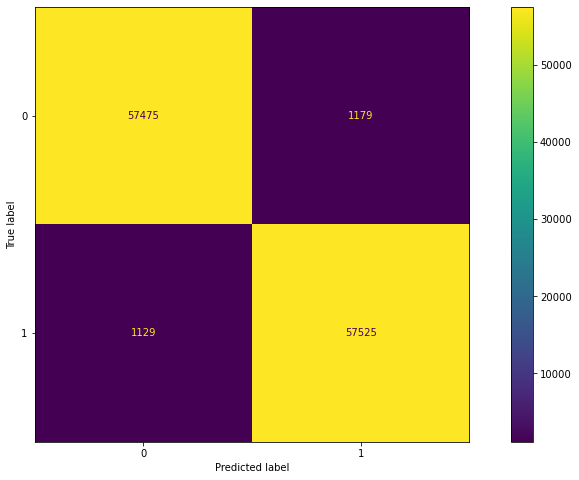

In [187]:
ann = MLPClassifier(hidden_layer_sizes= 1500,learning_rate='invscaling') # after smote and tuning train, results are amazing
mann = ann.fit(x_smote,y_smote)
y_pred_mann = mann.predict(x_smote)
print(metrics.classification_report(y_smote,y_pred_mann))
print('roc_auc-score:',metrics.roc_auc_score(y_smote,y_pred_mann))
print(metrics.plot_confusion_matrix(ann,x_smote,y_smote))

In [99]:
from sklearn.svm import SVC

In [189]:
svc = SVC(probability= True)
msvc = svc.fit(x_train,y_train)
y_pred_msvc = msvc.predict(x_test)
print(metrics.classification_report(y_test,y_pred_msvc))
print(metrics.roc_auc_score(y_test,y_pred_msvc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25138
           1       0.74      0.14      0.23      2375

    accuracy                           0.92     27513
   macro avg       0.83      0.57      0.59     27513
weighted avg       0.91      0.92      0.90     27513

0.5653711344954797


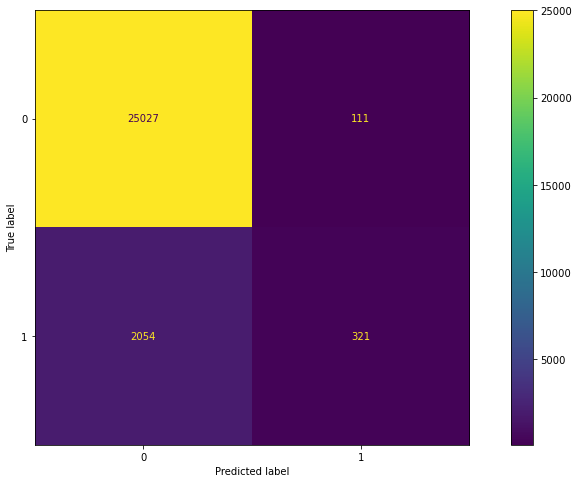

In [190]:
print(metrics.plot_confusion_matrix(svc,x_test,y_test))

In [654]:
svc = SVC(probability=True)
msvc = svc.fit(x_smote,y_smote)
y_pred_msvc = msvc.predict(x_test)
print(metrics.classification_report(y_test,y_pred_msvc))
print(metrics.roc_auc_score(y_test,y_pred_msvc))
print(metrics.plot_confusion_matrix(svc,x_test,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     25138
           1       0.29      0.67      0.40      2375

    accuracy                           0.83     27513
   macro avg       0.63      0.76      0.65     27513
weighted avg       0.91      0.83      0.86     27513

0.7577121489378631


In [ ]:
svc = SVC(probability=True)
msvc = svc.fit(x_smote,y_smote)
y_pred_msvc = msvc.predict(x_test)
print(metrics.classification_report(y_test,y_pred_msvc))
svc_best = round(metrics.roc_auc_score(y_test,y_pred_msvc), 4)
svc_best

In [ ]:
plot_roc(msvc,x_smote)

In [ ]:
svc = SVC(probability=True)
msvc = svc.fit(x_smote,y_smote)
y_pred_msvc = msvc.predict(x_test)
print(metrics.classification_report(y_test,y_pred_msvc))
print(metrics.roc_auc_score(y_test,y_pred_msvc))
print(metrics.plot_confusion_matrix(svc,x_test,y_test))

In [ ]:
# Hyper-parameter tuning for SVC

In [1]:
'''hpsv = [{'C':[1],'kernel':['linear','poly','sigmoid','rbf'], 'degree':[2,3]}]
svc = SVC(probability=True)
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)
sea = GridSearchCV(svc, param_grid= hpsv, cv =cv, scoring='roc_auc')
sea.fit(x_smote,y_smote)
print('Best Parameters are',sea.best_params_)'''

"hpsv = [{'C':[1],'kernel':['linear','poly','sigmoid','rbf'], 'degree':[2,3]}]\nsvc = SVC(probability=True)\ncv = ShuffleSplit(n_splits=1, test_size=0.3, random_state= 45)\nsea = GridSearchCV(svc, param_grid= hpsv, cv =cv, scoring='roc_auc')\nsea.fit(x_smote,y_smote)\nprint('Best Parameters are',sea.best_params_)"

# Random Forest Boost

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25138
           1       0.73      0.22      0.34      2375

    accuracy                           0.93     27513
   macro avg       0.83      0.61      0.65     27513
weighted avg       0.91      0.93      0.91     27513

roc_auc score 0.87


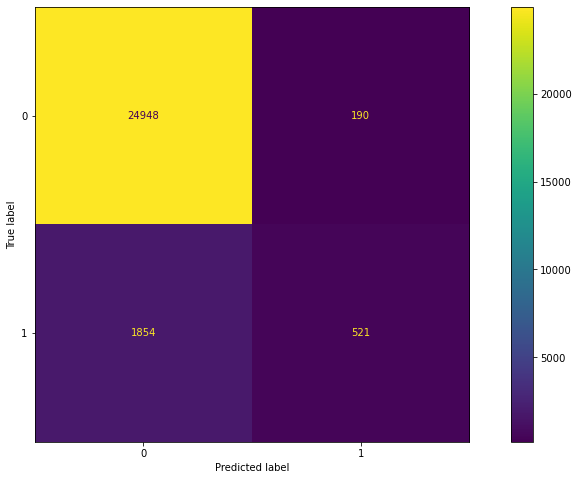

In [146]:
rf = RandomForestClassifier() # test
a = AdaBoostClassifier(base_estimator= rf,n_estimators=100,random_state= 39)
mrfa = a.fit(x_train,y_train)
y_pred_mrfa = mrfa.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mrfa))
y_pred_prob_rfa = mrfa.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_rfa),4))
#print(metrics.roc_auc_score(y_test,y_pred_mnba))
print(metrics.plot_confusion_matrix(mrfa,x_test,y_test))

In [88]:
rf = RandomForestClassifier() # test
a = AdaBoostClassifier(base_estimator= rf,n_estimators=100,random_state= 39)
mrfa = a.fit(x_train,y_train)
y_pred_mrfa = mrfa.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mrfa))
y_pred_prob_rfa = mrfa.predict_proba(x_test)[:,1]
rf_boost_best = round(metrics.roc_auc_score(y_test, y_pred_prob_rfa),4)
rf_boost_best

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25138
           1       0.71      0.22      0.34      2375

    accuracy                           0.92     27513
   macro avg       0.82      0.61      0.65     27513
weighted avg       0.91      0.92      0.91     27513



0.8602

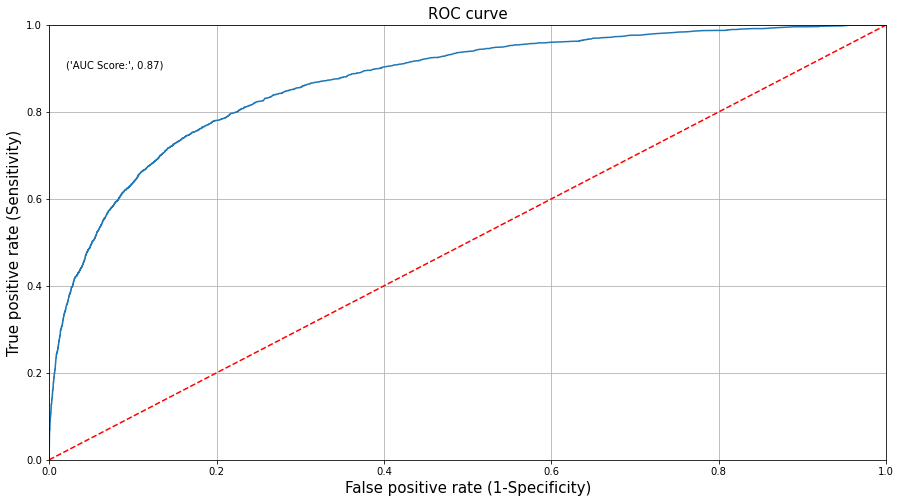

In [141]:
plot_roc(mrfa,x_test)

In [ ]:
# RF Boost with SMOTE

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25138
           1       0.45      0.46      0.46      2375

    accuracy                           0.90     27513
   macro avg       0.70      0.71      0.70     27513
weighted avg       0.91      0.90      0.91     27513

roc_auc score 0.8613


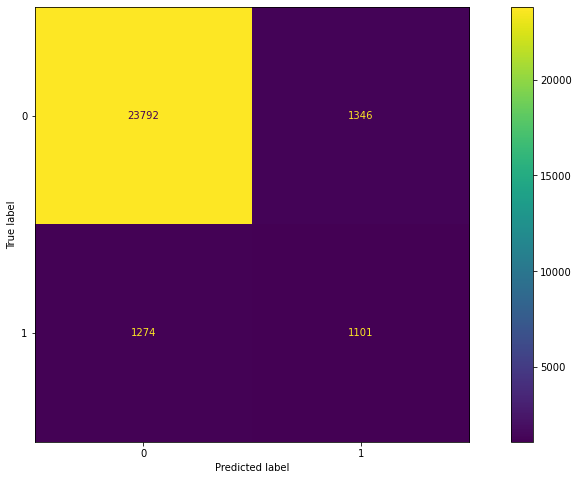

In [147]:
rf = RandomForestClassifier() # test
a = AdaBoostClassifier(base_estimator= rf,n_estimators=100,random_state= 39)
mrfa = a.fit(x_smote,y_smote)
y_pred_mrfa = mrfa.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mrfa))
y_pred_prob_rfa = mrfa.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_rfa),4))
#print(metrics.roc_auc_score(y_test,y_pred_mnba))
print(metrics.plot_confusion_matrix(mrfa,x_test,y_test))

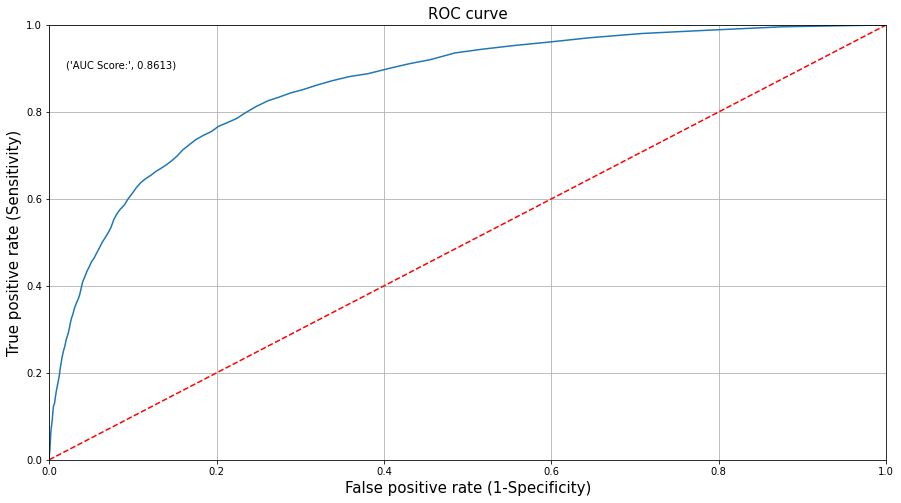

In [144]:
plot_roc(mrfa,x_test)

# Gradient Boost

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25138
           1       0.70      0.29      0.41      2375

    accuracy                           0.93     27513
   macro avg       0.82      0.64      0.69     27513
weighted avg       0.92      0.93      0.91     27513

roc_auc score 0.8752


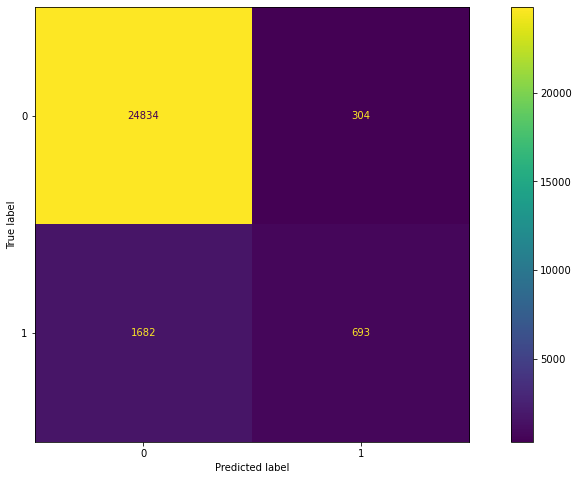

In [149]:
GB = GradientBoostingClassifier()
mgb = GB.fit(x_train,y_train)
y_pred_mgb = mgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mgb))
y_pred_prob_gb = mgb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_gb),4))
print(metrics.plot_confusion_matrix(mgb,x_test,y_test))

In [90]:
GB = GradientBoostingClassifier()
mgb = GB.fit(x_train,y_train)
y_pred_mgb = mgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mgb))
y_pred_prob_gb = mgb.predict_proba(x_test)[:,1]
gb_boost_best = round(metrics.roc_auc_score(y_test, y_pred_prob_gb),4)
gb_boost_best

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25138
           1       0.69      0.28      0.40      2375

    accuracy                           0.93     27513
   macro avg       0.81      0.64      0.68     27513
weighted avg       0.91      0.93      0.91     27513



0.8748

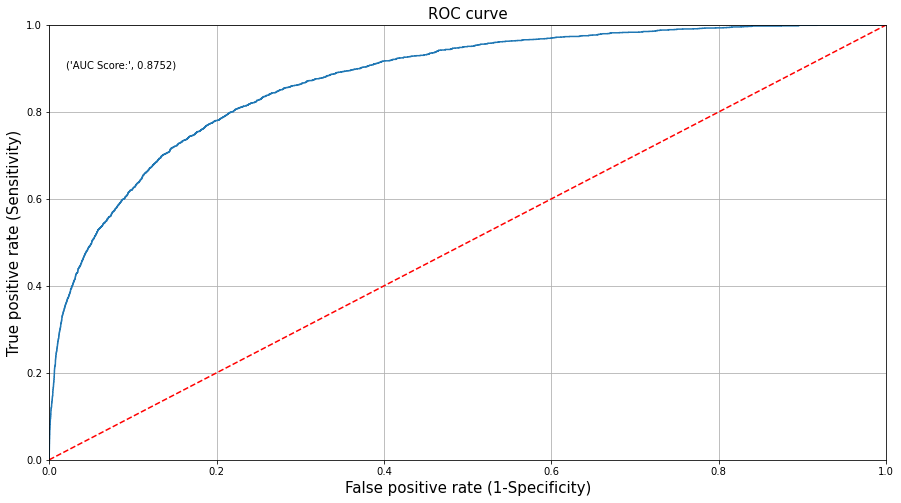

In [150]:
plot_roc(mgb,x_test)

In [151]:
# GB with SMOTE

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     25138
           1       0.36      0.59      0.45      2375

    accuracy                           0.88     27513
   macro avg       0.66      0.75      0.69     27513
weighted avg       0.91      0.88      0.89     27513

roc_auc score 0.865


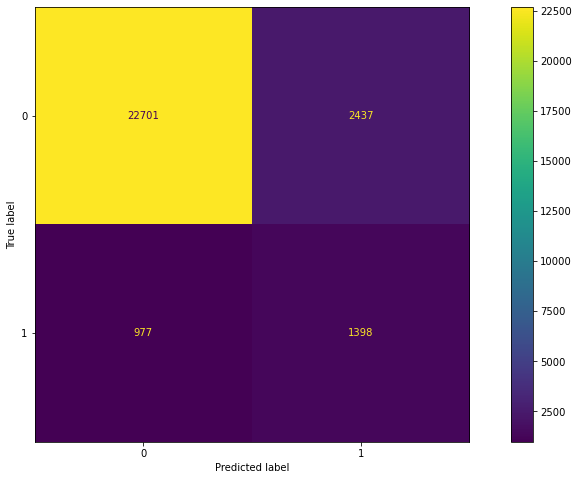

In [152]:
GB = GradientBoostingClassifier()
mgb = GB.fit(x_smote,y_smote)
y_pred_mgb = mgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mgb))
y_pred_prob_gb = mgb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_gb),4))
print(metrics.plot_confusion_matrix(mgb,x_test,y_test))

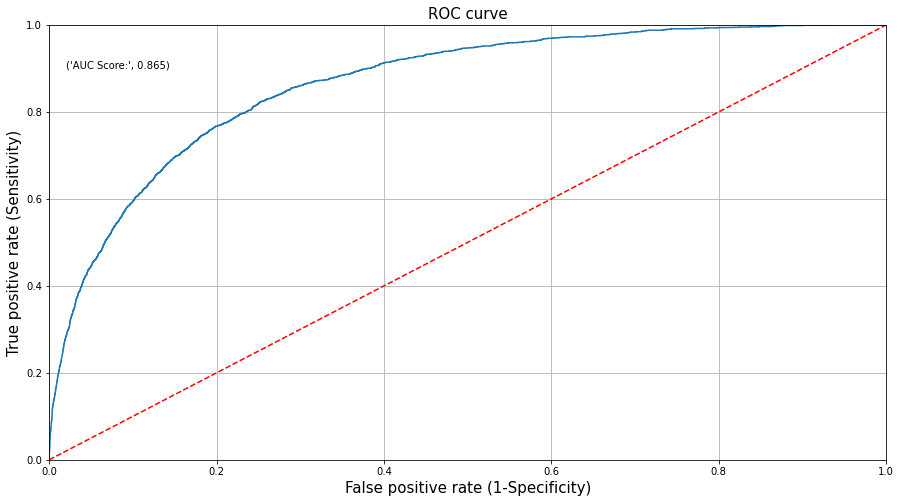

In [153]:
plot_roc(mgb,x_test)

# XG Boost

In [92]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25138
           1       0.64      0.29      0.40      2375

    accuracy                           0.92     27513
   macro avg       0.79      0.64      0.68     27513
weighted avg       0.91      0.92      0.91     27513

roc_auc score 0.8693


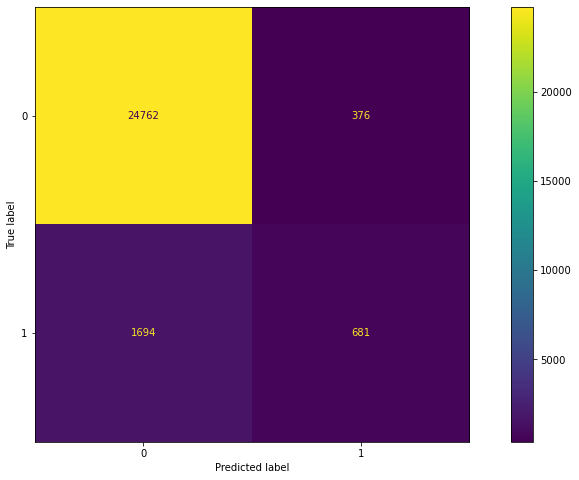

In [159]:
XGB = XGBClassifier()
mxgb = XGB.fit(x_train,y_train, eval_metric='auc')
y_pred_xgb = mxgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_xgb))
y_pred_prob_xgb = mxgb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_xgb),4))
print(metrics.plot_confusion_matrix(mxgb,x_test,y_test))

In [93]:
XGB = XGBClassifier()
mxgb = XGB.fit(x_train,y_train, eval_metric='auc')
y_pred_xgb = mxgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_xgb))
y_pred_prob_xgb = mxgb.predict_proba(x_test)[:,1]
xg_boost_best = round(metrics.roc_auc_score(y_test, y_pred_prob_xgb),4)
xg_boost_best

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25138
           1       0.65      0.28      0.39      2375

    accuracy                           0.92     27513
   macro avg       0.79      0.63      0.68     27513
weighted avg       0.91      0.92      0.91     27513



0.8665

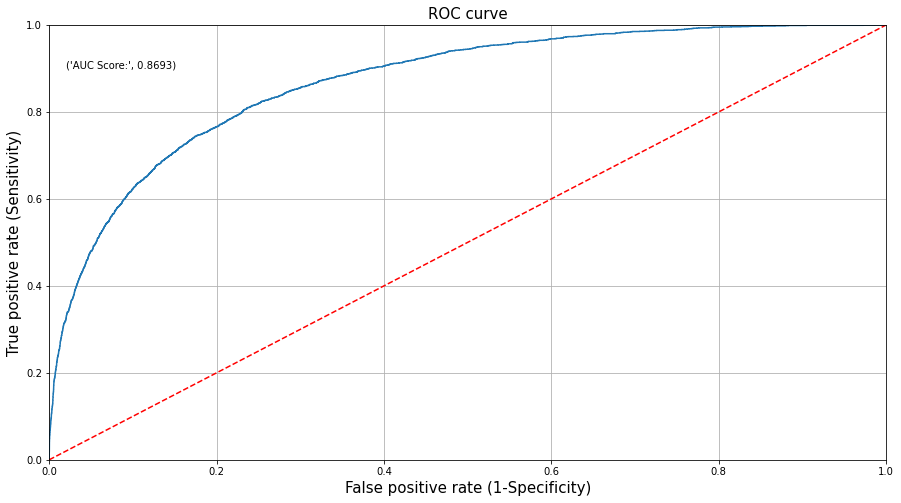

In [160]:
plot_roc(mxgb,x_test)

In [ ]:
# XG Boost with SMOTE

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25138
           1       0.60      0.33      0.43      2375

    accuracy                           0.92     27513
   macro avg       0.77      0.66      0.69     27513
weighted avg       0.91      0.92      0.91     27513

roc_auc score 0.8678


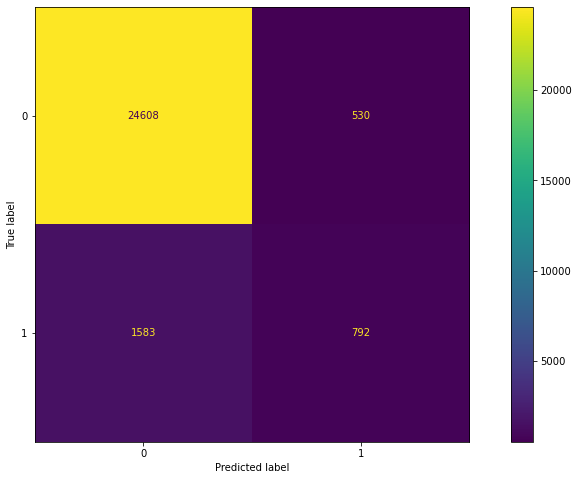

In [161]:
XGB = XGBClassifier()
mxgb = XGB.fit(x_smote,y_smote, eval_metric='auc')
y_pred_xgb = mxgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_xgb))
y_pred_prob_xgb = mxgb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_xgb),4))
print(metrics.plot_confusion_matrix(mxgb,x_test,y_test))

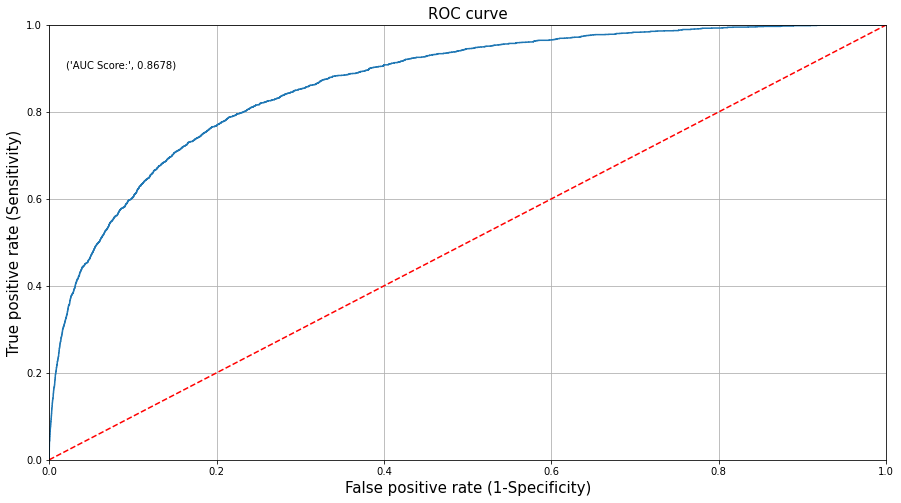

In [162]:
plot_roc(mxgb,x_test)

In [163]:
# Tuned XG Boost

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     25138
           1       0.57      0.36      0.44      2375

    accuracy                           0.92     27513
   macro avg       0.75      0.67      0.70     27513
weighted avg       0.91      0.92      0.91     27513

roc_auc score 0.8687


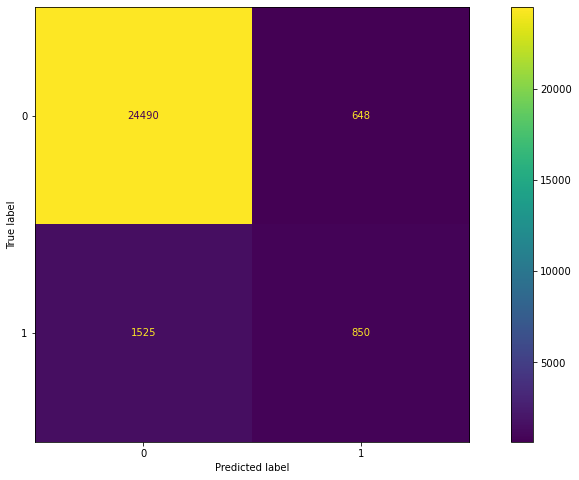

In [164]:
XGB = XGBClassifier(n_estimators = 111,gamma = 3, max_depth = 4,learning_rate = 0.3)
mxgb = XGB.fit(x_smote,y_smote, eval_metric='auc')
y_pred_xgb = mxgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_xgb))
y_pred_prob_xgb = mxgb.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_xgb),4))
print(metrics.plot_confusion_matrix(mxgb,x_test,y_test))

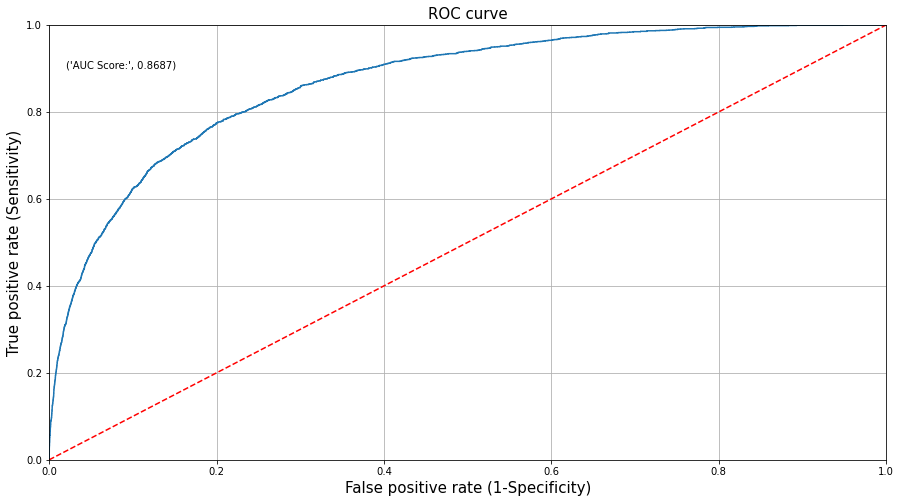

In [165]:
plot_roc(mxgb,x_test)

# Stacking

In [94]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# model 1 - 
# base Learners: RF, NB, XGB
# final_estimator : NB

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     25138
           1       0.42      0.56      0.48      2375

    accuracy                           0.90     27513
   macro avg       0.69      0.74      0.71     27513
weighted avg       0.91      0.90      0.90     27513

roc_auc score 0.8689


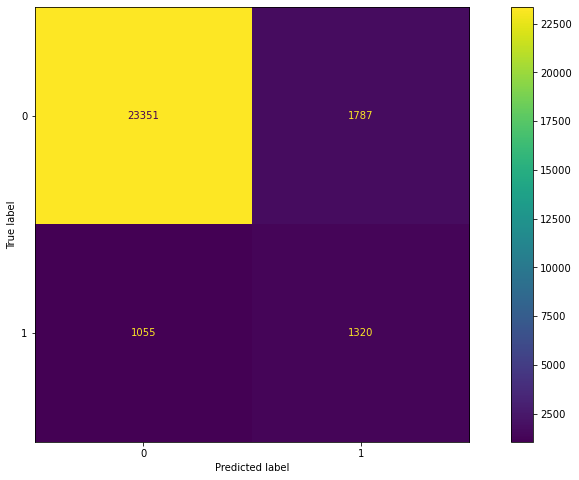

In [168]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms1 = stack_model.fit(x_train,y_train)
y_pred_ms1 = ms1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms1))
y_pred_prob_ms1 = ms1.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ms1),4))
print(metrics.plot_confusion_matrix(ms1,x_test,y_test))

In [95]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms1 = stack_model.fit(x_train,y_train)
y_pred_ms1 = ms1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms1))
y_pred_prob_ms1 = ms1.predict_proba(x_test)[:,1]
Stacking_ms1_best = round(metrics.roc_auc_score(y_test, y_pred_prob_ms1),4)
Stacking_ms1_best

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     25138
           1       0.42      0.55      0.48      2375

    accuracy                           0.90     27513
   macro avg       0.69      0.74      0.71     27513
weighted avg       0.91      0.90      0.90     27513



0.8685

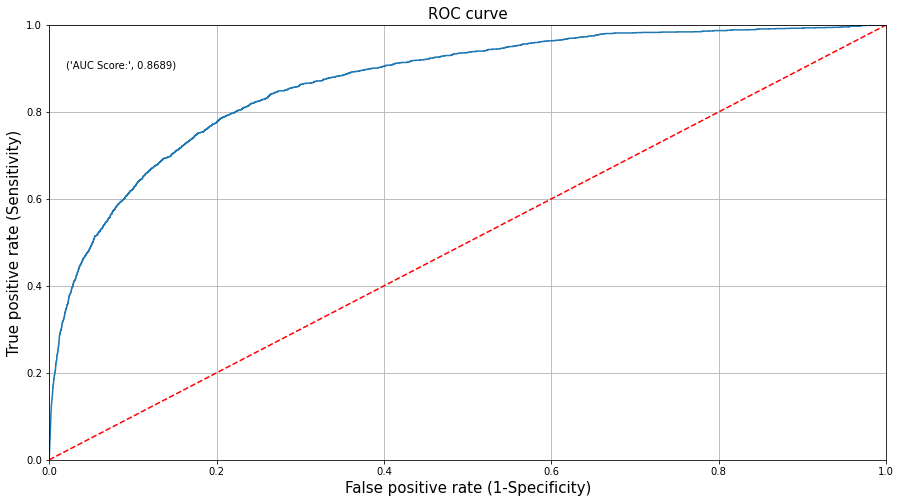

In [169]:
plot_roc(ms1,x_test)

In [ ]:
# Stacking model 1 with smote

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     25138
           1       0.39      0.59      0.47      2375

    accuracy                           0.88     27513
   macro avg       0.67      0.75      0.70     27513
weighted avg       0.91      0.88      0.89     27513

roc_auc score 0.8694


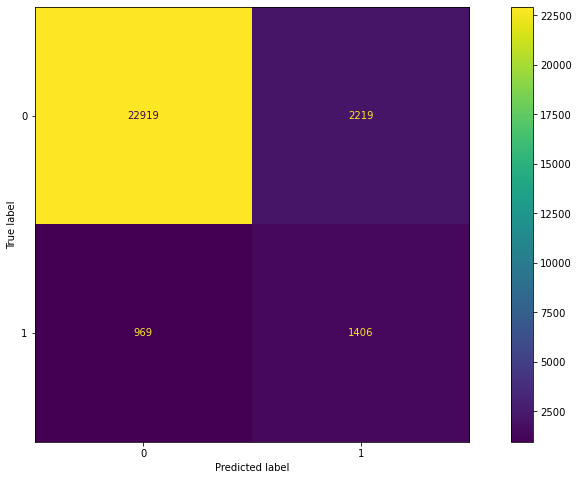

In [170]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms1 = stack_model.fit(x_smote,y_smote)
y_pred_ms1 = ms1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms1))
y_pred_prob_ms1 = ms1.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ms1),4))
print(metrics.plot_confusion_matrix(ms1,x_test,y_test))

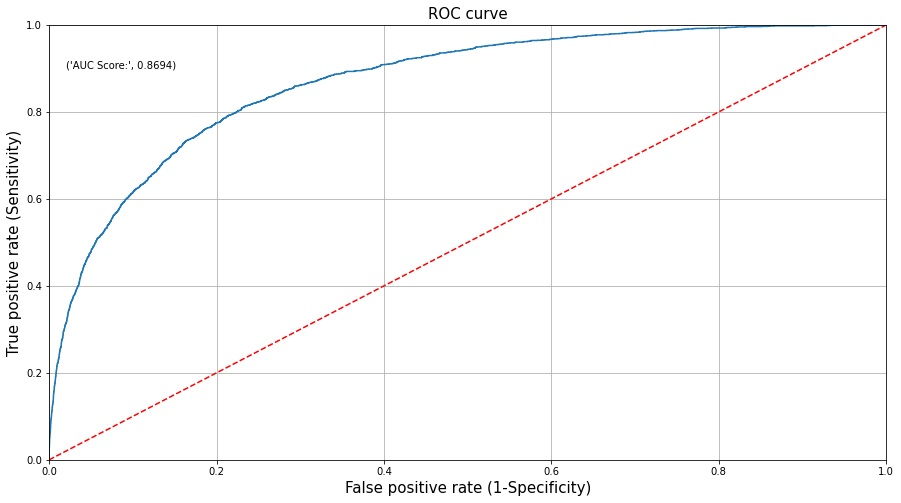

In [171]:
plot_roc(ms1,x_test)

In [ ]:
# model 2 - 
# base Learners: GB, NB, XGB
# final_estimator : NB

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     25138
           1       0.45      0.54      0.49      2375

    accuracy                           0.90     27513
   macro avg       0.70      0.74      0.72     27513
weighted avg       0.91      0.90      0.91     27513

roc_auc score 0.8705


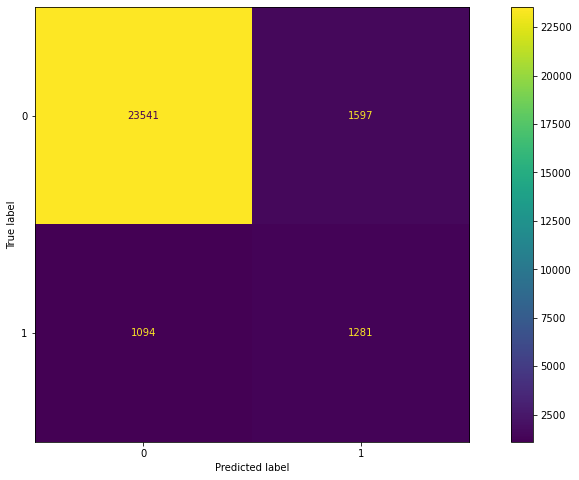

In [172]:
base_learners = [('GB_model', GradientBoostingClassifier()),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms2 = stack_model.fit(x_train,y_train)
y_pred_ms2 = ms2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms2))
y_pred_prob_ms2 = ms2.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ms2),4))
print(metrics.plot_confusion_matrix(ms2,x_test,y_test))

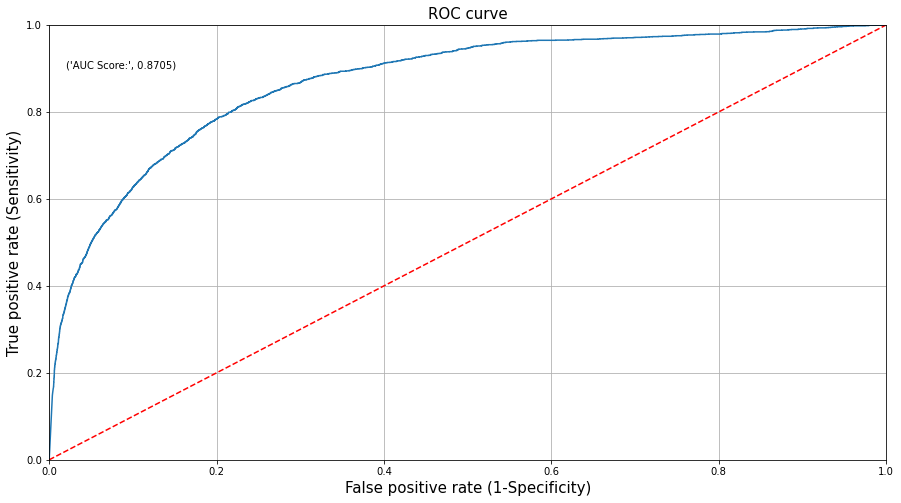

In [173]:
plot_roc(ms2,x_test)

In [118]:
base_learners = [('GB_model', GradientBoostingClassifier()),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms23 = stack_model.fit(x_train,y_train)
y_pred_ms23 = ms23.predict(x_train)
print(metrics.classification_report(y_train,y_pred_ms23))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     58654
           1       0.46      0.55      0.50      5540

    accuracy                           0.90     64194
   macro avg       0.71      0.75      0.72     64194
weighted avg       0.91      0.90      0.91     64194



              precision    recall  f1-score   support

           0       0.96      0.92      0.94     25138
           1       0.40      0.57      0.47      2375

    accuracy                           0.89     27513
   macro avg       0.68      0.74      0.71     27513
weighted avg       0.91      0.89      0.90     27513

roc_auc score 0.8714


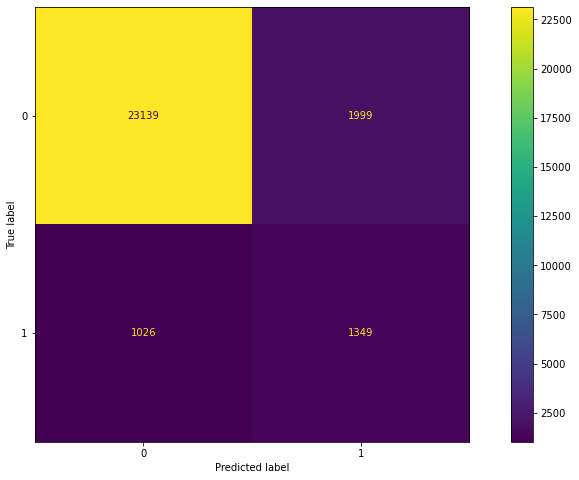

In [174]:
base_learners = [('GB_model', GradientBoostingClassifier()),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms2 = stack_model.fit(x_smote,y_smote)
y_pred_ms2 = ms2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms2))
y_pred_prob_ms2 = ms2.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_ms2),4))
print(metrics.plot_confusion_matrix(ms2,x_test,y_test))

In [96]:
base_learners = [('GB_model', GradientBoostingClassifier()),
                 ('NB_model', GaussianNB()),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
ms2 = stack_model.fit(x_smote,y_smote)
y_pred_ms2 = ms2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_ms2))
y_pred_prob_ms2 = ms2.predict_proba(x_test)[:,1]
Stacking_ms2_best = round(metrics.roc_auc_score(y_test, y_pred_prob_ms2),4)
Stacking_ms2_best

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     25138
           1       0.41      0.56      0.47      2375

    accuracy                           0.89     27513
   macro avg       0.68      0.74      0.71     27513
weighted avg       0.91      0.89      0.90     27513



0.8696

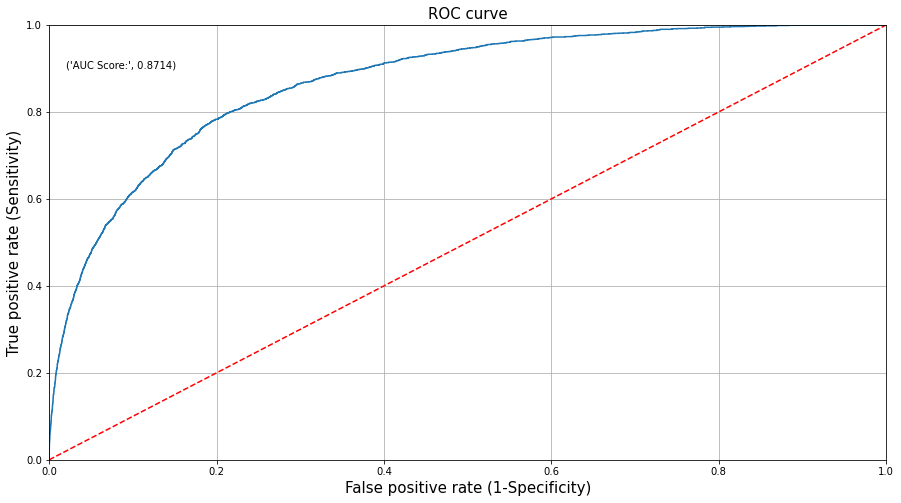

In [175]:
plot_roc(ms2,x_test)

# Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25138
           1       0.61      0.33      0.43      2375

    accuracy                           0.92     27513
   macro avg       0.78      0.65      0.69     27513
weighted avg       0.91      0.92      0.91     27513

roc_auc score 0.8694


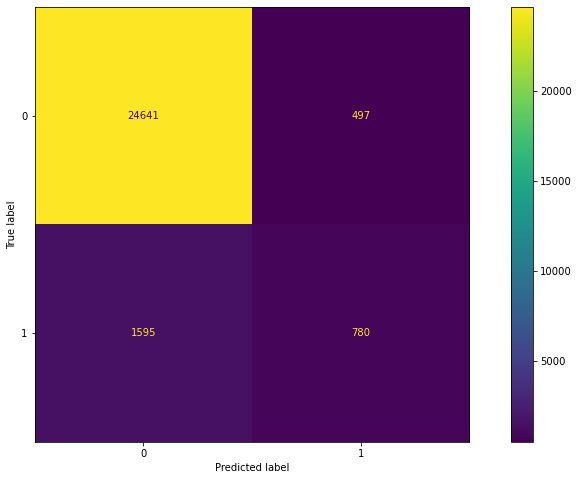

In [178]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv1 = vote_model.fit(x_train,y_train)
y_pred_mv1 = mv1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv1))
y_pred_prob_mv1 = ms1.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_mv1),4))
print(metrics.plot_confusion_matrix(mv1,x_test,y_test))

In [98]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv1 = vote_model.fit(x_train,y_train)
y_pred_mv1 = mv1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv1))
y_pred_prob_mv1 = ms1.predict_proba(x_test)[:,1]
Voting_mv1_best = round(metrics.roc_auc_score(y_test, y_pred_prob_mv1),4)
Voting_mv1_best

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25138
           1       0.62      0.32      0.42      2375

    accuracy                           0.92     27513
   macro avg       0.78      0.65      0.69     27513
weighted avg       0.91      0.92      0.91     27513



0.8685

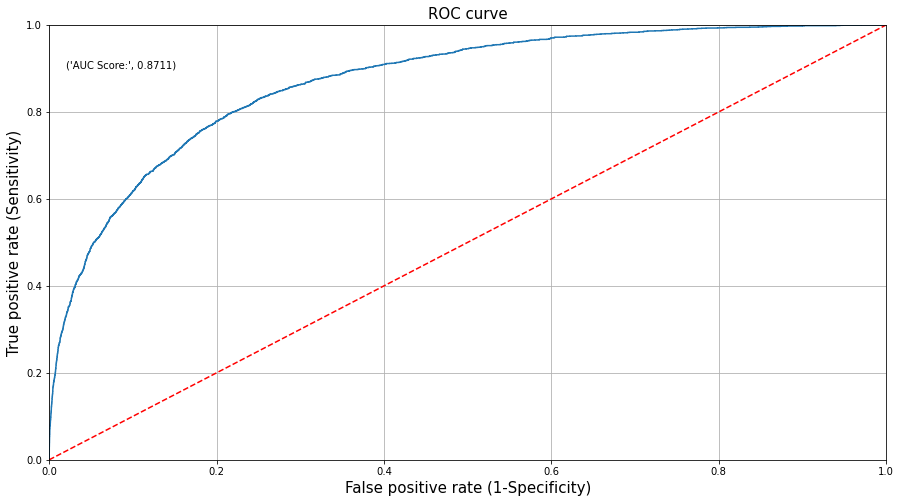

In [179]:
plot_roc(mv1,x_test)

In [ ]:
# Voting model 1 with smote

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     25138
           1       0.32      0.65      0.43      2375

    accuracy                           0.85     27513
   macro avg       0.64      0.76      0.67     27513
weighted avg       0.91      0.85      0.87     27513

roc_auc score 0.8671


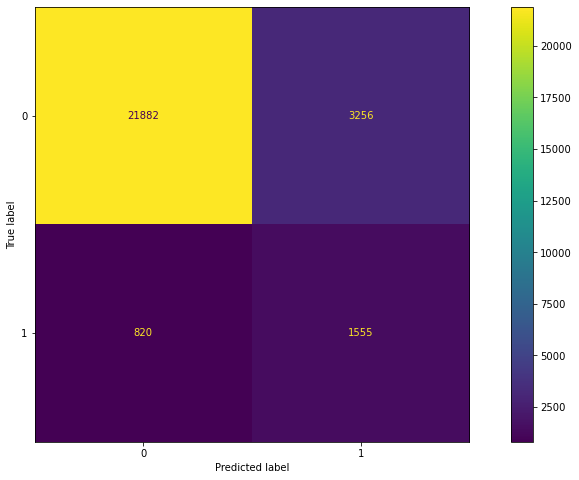

In [182]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 4, 
                                                     n_estimators = 93, random_state = 45)),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv1 = vote_model.fit(x_smote,y_smote)
y_pred_mv1 = mv1.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv1))
y_pred_prob_mv1 = mv1.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_mv1),4))
print(metrics.plot_confusion_matrix(mv1,x_test,y_test))

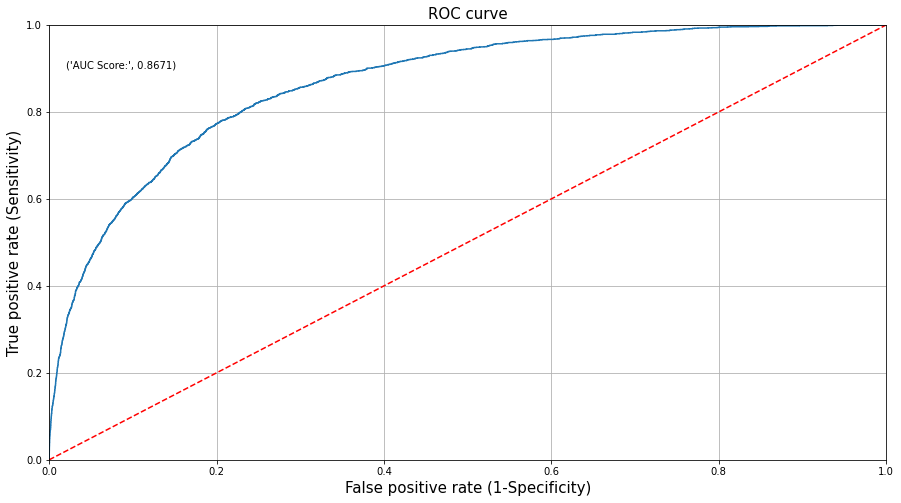

In [183]:
plot_roc(mv1,x_test)

In [ ]:
# Voting Model 2

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     25138
           1       0.57      0.38      0.46      2375

    accuracy                           0.92     27513
   macro avg       0.76      0.68      0.71     27513
weighted avg       0.91      0.92      0.91     27513

roc_auc score 0.8735


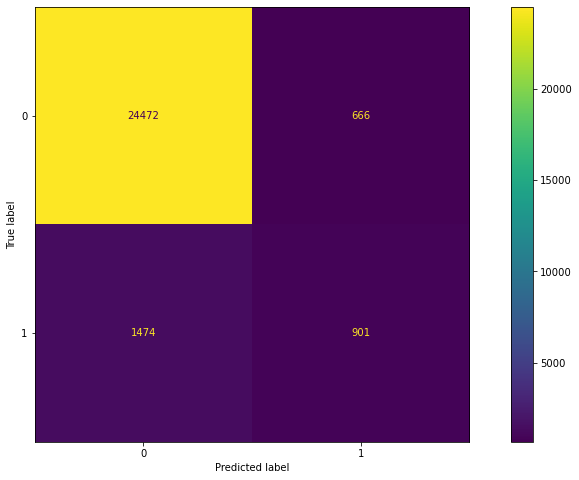

In [184]:
base_learners = [('ann_model', MLPClassifier(learning_rate='invscaling')),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv2 = vote_model.fit(x_train,y_train)
y_pred_mv2 = mv2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv2))
y_pred_prob_mv2 = mv2.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_mv2),4))
print(metrics.plot_confusion_matrix(mv2,x_test,y_test))

In [99]:
base_learners = [('ann_model', MLPClassifier(learning_rate='invscaling')),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv2 = vote_model.fit(x_train,y_train)
y_pred_mv2 = mv2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv2))
y_pred_prob_mv2 = mv2.predict_proba(x_test)[:,1]
Voting_mv2_best = round(metrics.roc_auc_score(y_test, y_pred_prob_mv2),4)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     25138
           1       0.55      0.40      0.46      2375

    accuracy                           0.92     27513
   macro avg       0.75      0.68      0.71     27513
weighted avg       0.91      0.92      0.91     27513



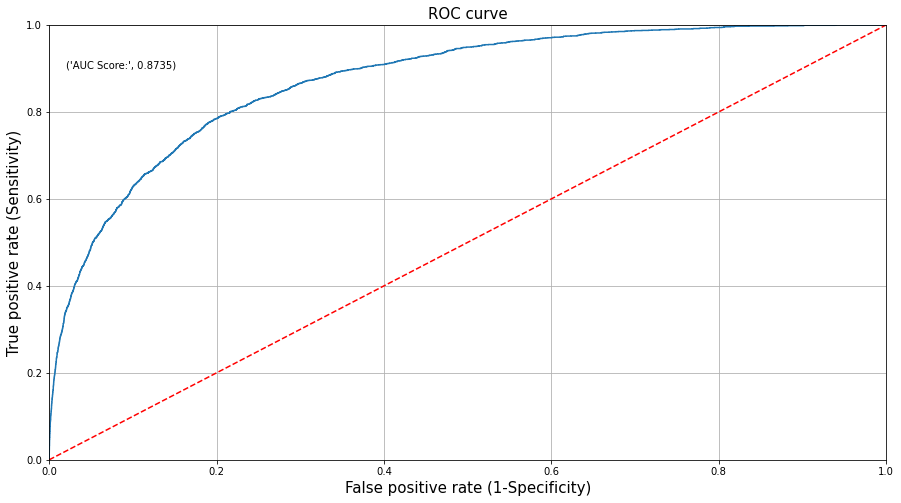

In [185]:
plot_roc(mv2,x_test)

In [ ]:
# Voting model 2 with smote

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     25138
           1       0.36      0.61      0.46      2375

    accuracy                           0.87     27513
   macro avg       0.66      0.76      0.69     27513
weighted avg       0.91      0.87      0.89     27513

roc_auc score 0.8677


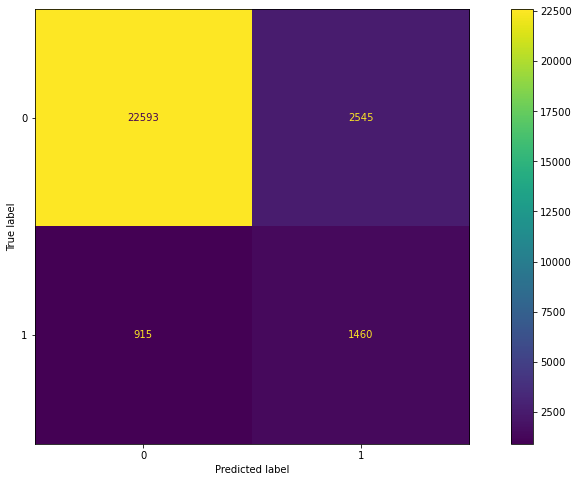

In [186]:
base_learners = [('ann_model', MLPClassifier(learning_rate='invscaling')),
                 ('NB_bag_model', BaggingClassifier(base_estimator=GaussianNB(),n_estimators=9)),
                 ('XGB_model', XGBClassifier(n_estimators=111 ,gamma=3 , learning_rate=0.3 , max_depth = 4,eval_metric = 'auc'))]


vote_model = VotingClassifier(estimators = base_learners, voting='soft')
mv2 = vote_model.fit(x_smote,y_smote)
y_pred_mv2 = mv2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_mv2))
y_pred_prob_mv2 = mv2.predict_proba(x_test)[:,1]
print('roc_auc score',round(metrics.roc_auc_score(y_test, y_pred_prob_mv2),4))
print(metrics.plot_confusion_matrix(mv2,x_test,y_test))

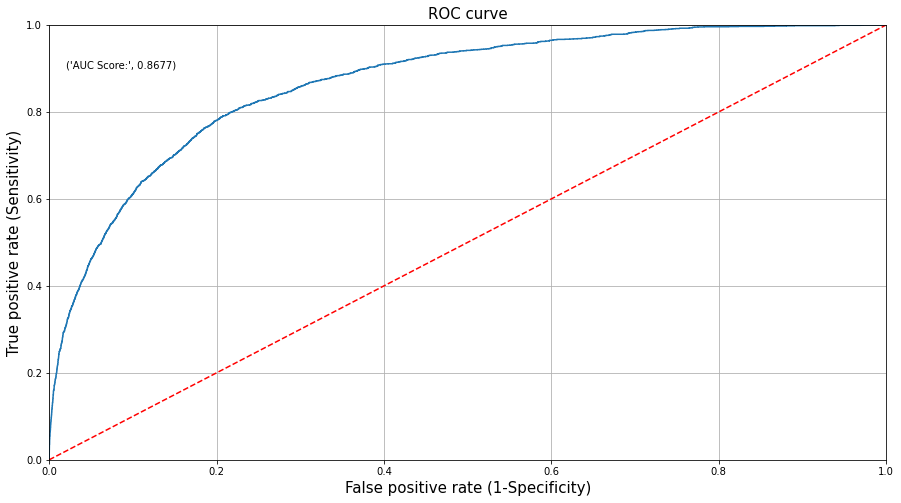

In [187]:
plot_roc(mv2,x_test)

In [102]:
# ROC score for the best score obtained feom each model

In [111]:
def plot_roc1(model, test_data, title, x, y):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label= title)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = x, y = y, s = (title,'AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

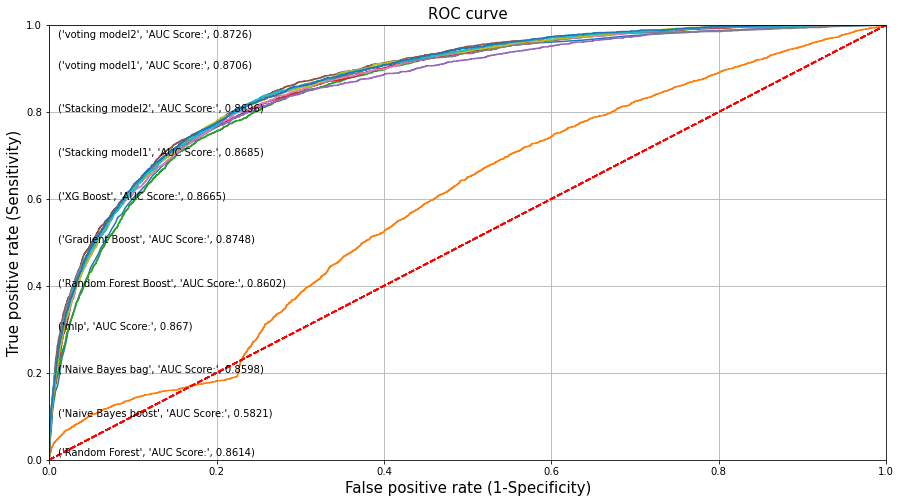

In [115]:
plot_roc1(mrf,x_test, 'Random Forest', 0.01, 0.01)
plot_roc1(mnba,x_test, 'Naive Bayes boost', 0.01, 0.1)
plot_roc1(mbnb,x_test, 'Naive Bayes bag', 0.01, 0.2)
plot_roc1(mann,x_test, 'mlp', 0.01, 0.3)
plot_roc1(mrfa,x_test, 'Random Forest Boost', 0.01, 0.4)
plot_roc1(mgb,x_test, 'Gradient Boost', 0.01, 0.5)
plot_roc1(mxgb,x_test, 'XG Boost', 0.01, 0.6)
plot_roc1(ms1,x_test, 'Stacking model1', 0.01, 0.7)
plot_roc1(ms2,x_test, 'Stacking model2', 0.01, 0.8)
plot_roc1(mv1,x_test, 'voting model1', 0.01, 0.9)
plot_roc1(mv2,x_test, 'voting model2', 0.01, 0.97)

In [ ]:
# ROC_AUC score for all the models with and without smote

In [117]:
df_name = pd.DataFrame({'without smote':[0.8622,0.5300, 0.6292, 0.8606, 0.7853, 0.8615, 0.5653, 0.8700, 0.8752, 0.8693, 0.8689, 0.8705, 0.8694, 0.8735], 'with smote': [0.8610, 0.8545, 0.6983, 0.8593, 0.8594, 0.8315, 0.7577, 0.8613, 0.8650, 0.8678, 0.8694, 0.8714, 0.8671, 0.8677]}, index = ['Random Forest', 'Random Forest tuning', 'Naive Bayes boost', 'Naive Bayes bag', 'Naive Bayes bag tuned', 'Neural Network', 'SVC', 'Random Forest Boost', 'Gradient Boost', 'XG Boost', 'Stacking model-1', 'Stacking model-2', 'voting model-1', 'voting model-2'])
df_name

,without smote,with smote
Random Forest,0.8622,0.8610
Random Forest tuning,0.5300,0.8545
Naive Bayes boost,0.6292,0.6983
Naive Bayes bag,0.8606,0.8593
Naive Bayes bag tuned,0.7853,0.8594
Neural Network,0.8615,0.8315
SVC,0.5653,0.7577
Random Forest Boost,0.8700,0.8613
Gradient Boost,0.8752,0.8650
XG Boost,0.8693,0.8678
